In [28]:
%pip install pdfplumber pandas
%pip install PyPDF2
%pip install pymupdf
%pip install pycryptodome
%pip install tabulate
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [29]:
# Import necessary libraries
%pip install contractions langdetect requests nltk spacy
%pip install unidecode
%pip install beautifulsoup4
import numpy as np
import pandas as pd  # library for data manipulation and analysis
import re  # library for regular expressions
import os  # library for operating system dependent functionality
import string  # library for string operations
import nltk  # library for natural language processing
import spacy  # library for advanced natural language processing
import requests  # library for making HTTP requests
import contractions  # library for expanding contractions
from langdetect import detect  # library for language detection
from nltk.corpus import stopwords  # library for stop words
from nltk.stem import WordNetLemmatizer  # library for lemmatizing words
from nltk.tokenize import word_tokenize, sent_tokenize  # libraries for tokenizing text
from unidecode import unidecode  # library for converting accented characters
from bs4 import BeautifulSoup  # library for parsing HTML and XML documents
from nltk.sentiment import SentimentIntensityAnalyzer  # library for sentiment analysis
nltk.download('vader_lexicon')  # download the VADER sentiment analysis lexicon
nltk.download('wordnet')  # download WordNet for lemmatization
nltk.download('stopwords')  # download stopwords for text preprocessing
nltk.download('punkt')  # download the Punkt tokenizer for sentence segmentation
nltk.download('maxent_ne_chunker')  # download the maximum entropy chunker for named entity recognition
nltk.download('averaged_perceptron_tagger')  # download the averaged perceptron tagger for part-of-speech tagging
nltk.download('words')  # download the NLTK corpus of words

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/seyyiduzun/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/seyyiduzun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/seyyiduzun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/seyyiduzun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/seyyiduzun/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/seyyiduzun/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data] 

True

In [30]:
import os
import pandas as pd
from pdfminer.high_level import extract_text
from pathlib import Path
from nltk import FreqDist
from nltk.tokenize import word_tokenize

# Definiere den Pfad zum Ordner mit den PDFs
pdf_folder = '/Users/seyyiduzun/Documents/Bachelorarbeit/Bachelorarbeit/stage 0/2021/SustainabilityReports2021'

# Initialisiere ein leeres DataFrame für die Ergebnisse
result_df = pd.DataFrame(columns=['company', 'content', 'datatype', 'date', 'internal', 'title'])

def process_pdf(pdf_path):
    # Extrahiere den Unternehmensnamen und das Jahr aus dem Dateinamen
    match = re.match(r'(.+?)_(\d+)_SR\.pdf', pdf_path.name)
    if match:
        company_name = match.group(1)
        report_year = int(match.group(2))

        # Öffne die PDF-Datei und extrahiere den Text
        text = extract_text(pdf_path)

        # Extrahiere das Jahr aus dem Dateinamen
        date_match = re.match(r'.+?_(\d+)_SR\.pdf', pdf_path.name)
        date = int(date_match.group(1)) if date_match else None

        # Finde das am häufigsten vorkommende Wort (Title)
        words = word_tokenize(text.lower())
        title = FreqDist(words).max() if words else None

        # Füge die extrahierten Informationen zum DataFrame hinzu
        result_df.loc[len(result_df)] = {
            'company': company_name,
            'content': text,
            'datatype': 'Sustainability Report',
            'date': date,
            'internal': 1,
            'title': title
        }

# Iteriere über alle Dateien im PDF-Ordner
for pdf_path in Path(pdf_folder).glob('*.pdf'):
    process_pdf(pdf_path)

# Speichere das DataFrame als CSV-Datei
result_df.to_csv('/Users/seyyiduzun/Documents/Bachelorarbeit/Bachelorarbeit/output/SustainReports2021.csv', index=False)


The PDF <_io.BufferedReader name='/Users/seyyiduzun/Documents/Bachelorarbeit/Bachelorarbeit/stage 0/2021/SustainabilityReports2021/Symrise_2021_SR.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding. Use the check_extractable if you want to raise an error in this case
The PDF <_io.BufferedReader name='/Users/seyyiduzun/Documents/Bachelorarbeit/Bachelorarbeit/stage 0/2021/SustainabilityReports2021/Beiersdorf_2021_SR.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding. Use the check_extractable if you want to raise an error in this case
The PDF <_io.BufferedReader name='/Users/seyyiduzun/Documents/Bachelorarbeit/Bachelorarbeit/stage 0/2021/SustainabilityReports2021/Infineon_2021_SR.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding. Use the check_extractable if you want to raise an erro

In [31]:
# Zeige den Inhalt der CSV-Datei an
df = pd.read_csv('/Users/seyyiduzun/Documents/Bachelorarbeit/Bachelorarbeit/output/SustainReports2021.csv')
df.head(37)

,company,content,datatype,date,internal,title
0,Rheinmetall,Basic information on the rheinmetall GroupStru...,Sustainability Report,2021,1,the
1,SiemensEnergy,Sustainability Report 2021 \n\nCreating transp...,Sustainability Report,2021,1,","
2,Symrise,20 \n21 \n\nSustainability Record \n(GRI) \n\...,Sustainability Report,2021,1,the
3,Continetnal,Turn Change Into Opportunity – \nEmbrace Susta...,Sustainability Report,2021,1,the
4,DeutscheBank,Deutsche Bank\n\n Non-Financial Report \n2021\...,Sustainability Report,2021,1,and
5,Covestro,COMBINED \n MANAGEMENT REPORT\n\nCOMBINED MANA...,Sustainability Report,2021,1,the
6,MTU,"Acting for tomorrow, today \nOUR RESPONSIBILI...",Sustainability Report,2021,1,the
7,Bayer,Sustainability Report\n\n2021\n\n Contents \n\...,Sustainability Report,2021,1,the
8,MuenchenerRueck,Sustainability \nReport 2021\n\n Munich Re \n...,Sustainability Report,2021,1,.
9,Zalando,Sustainability \nProgress Report\n2021\n\n Our...,Sustainability Report,2021,1,","


In [32]:
df.shape

(37, 6)

In [33]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('/Users/seyyiduzun/Documents/Bachelorarbeit/Bachelorarbeit/output/SustainReports2021.csv')

# Check datatypes
print(df.dtypes)

company     object
content     object
datatype    object
date         int64
internal     int64
title       object
dtype: object


In [34]:
import pandas as pd
import os

# Define function to save intermediary steps in a file
def csv_checkpoint(df, filename='checkpoint'):
    """
    Saves a DataFrame to a CSV file and loads it back into a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame to save and load.
        filename (str): The name of the CSV file to save the DataFrame to (default: 'checkpoint').

    Returns:
        pandas.DataFrame: The loaded DataFrame.
    """
    if not os.path.exists('../data/checkpoints/'):  # Check if the directory exists and create it if it doesn't
        os.makedirs('../data/checkpoints/')

    # Save DataFrame to CSV
    df.to_csv(f'../data/checkpoints/{filename}.csv', index=False, sep='|')  # Save DataFrame to CSV with specified filename
    print(f'Saved DataFrame to {filename}.csv')

    # Load CSV back into DataFrame
    df = pd.read_csv(f'../data/checkpoints/{filename}.csv', delimiter='|')  # Load CSV back into DataFrame
    print(f'Loaded DataFrame from {filename}.csv')

    return df


**General Data Cleaning**

As initial data cleaning steps, the following is conducted:


* Duplicate entries were identified and removed, resulting in a cleaner and more concise dataset. Duplicates can distort the data and lead to biased analysivs.
* Language checking was conducted and all rows with non-English content were dropped to ensure consistent language. Language inconsistencies can create bias in the data and lead to inaccurate conclusions. Therefore, it is important to ensure that the data is consistent in language to prevent linguistic biases.
* Remove company name parts like "AG" for clarity
* The "sample" method was used to check the data for representativeness and potential issues.

In [35]:
# Check for duplicates and delete them
duplicates = df[df.duplicated()]
print(f'Duplicated rows: {len(duplicates)}')
df = df.drop_duplicates()


Duplicated rows: 0


In [36]:
general_cleaned_data = df.copy(deep=True)

In [37]:
from langdetect import detect

# Check for other languages than English
general_cleaned_data['language'] = general_cleaned_data['content'].apply(lambda x: detect(x))
not_english = len(general_cleaned_data.loc[general_cleaned_data['language'] != 'en'])

# Print the number of rows with other languages
print(f'Number of rows with language other than English: {not_english}')

# Drop the 'language' column
general_cleaned_data.drop(['language'], axis=1, inplace=True)

Number of rows with language other than English: 1


In [38]:
general_cleaned_data.shape

(37, 6)

In [39]:
general_cleaned_data.head(37)

,company,content,datatype,date,internal,title
0,Rheinmetall,Basic information on the rheinmetall GroupStru...,Sustainability Report,2021,1,the
1,SiemensEnergy,Sustainability Report 2021 \n\nCreating transp...,Sustainability Report,2021,1,","
2,Symrise,20 \n21 \n\nSustainability Record \n(GRI) \n\...,Sustainability Report,2021,1,the
3,Continetnal,Turn Change Into Opportunity – \nEmbrace Susta...,Sustainability Report,2021,1,the
4,DeutscheBank,Deutsche Bank\n\n Non-Financial Report \n2021\...,Sustainability Report,2021,1,and
5,Covestro,COMBINED \n MANAGEMENT REPORT\n\nCOMBINED MANA...,Sustainability Report,2021,1,the
6,MTU,"Acting for tomorrow, today \nOUR RESPONSIBILI...",Sustainability Report,2021,1,the
7,Bayer,Sustainability Report\n\n2021\n\n Contents \n\...,Sustainability Report,2021,1,the
8,MuenchenerRueck,Sustainability \nReport 2021\n\n Munich Re \n...,Sustainability Report,2021,1,.
9,Zalando,Sustainability \nProgress Report\n2021\n\n Our...,Sustainability Report,2021,1,","


**Text Data Cleaning & Preprocessing**

The "content" column, containing the text of the reports, undergoes a series of cleaning, normalization, and preprocessing steps to ensure accurate and efficient analysis. These steps include:

* String conversion: Converting the input to a string format ensures consistency and compatibility during subsequent processing tasks.
* Lowercase conversion: Transforming all text to lowercase serves as a simple normalization step, reducing the complexity and variability of the input data.
* Unicode decoding: Removing diacritics (e.g., accented characters) and normalizing the text encoding mitigates potential discrepancies arising from different encoding formats.
* URL and email address removal: Eliminating URLs and email addresses reduces noise in the dataset, as these elements do not contribute valuable information for the analysis.
* Extra whitespace removal: Eradicating extra whitespaces improves text analysis and tokenization by ensuring that only meaningful spaces are retained.
* Contact detail removal: Excluding phone numbers, contact person strings, and social media references further minimizes noise in the dataset, honing the focus on relevant text.
* Table of contents removal: Discarding the table of contents enhances the data quality by eliminating repetitive and non-essential information.
* Named entity removal: Employing the spaCy model to remove human names and other named entities optimizes the text for analysis and modeling by concentrating on pertinent content.
* Abbreviation expansion: Utilizing the contractions library and custom functions with regular expressions, common and uncommon abbreviations are expanded to improve text interpretation.
* Special character elimination: Excluding all special characters, except punctuation, refines the input data. Retaining punctuation is necessary for accurate sentence tokenization and removed after sentence tokenization..
* Tokenization and lemmatization: Tokenizing words and sentences, and subsequently lemmatizing words using the WordNetLemmatizer from nltk, streamlines the text and reduces morphological variations.
* Stopword removal: Customizing the nltk stopwords list by adding or removing specific stopwords enables more precise and tailored text analysis.
* Part-of-speech (POS) tagging: Assigning POS tags to words and sentences enhances the text representation by providing additional linguistic information, which may be beneficial for subsequent analysis and modeling tasks.
* Sentiment Analysis: Basic sentiment value calculation on the tokenzued sentences to get first insights im terms of the sentiments in the reports within the EDA.

In [40]:
cleaned_data= general_cleaned_data.copy(deep=True)

In [41]:
!python -m spacy download en_core_web_md
# Since the spacy model shows better results on the "raw" text, the named entity removal is conducted before all normalization and cleaning steps
spacy_model = spacy.load('en_core_web_md')
spacy_model.max_length = 1800000 # Increase max text length

def remove_named_entities(text):
    """
    Removes named entities from text and returns the modified text and the count of named entities removed.

    Args:
        text (str): The text to remove named entities from.

    Returns:
        tuple: A tuple containing the modified text (str) and the count of named entities removed (int).
    """
    doc = spacy_model(text)
    
    named_entities = set()
    for ent in doc.ents:
        if ent.label_ in ["PERSON"]:
            named_entities.add(ent.text)
    
    named_entities_count = len(named_entities)
    
    for named_entity in named_entities:
        text = text.replace(named_entity, '')
    
    return text, named_entities_count

# Assuming cleaned_data is a pandas DataFrame with a 'content' column
cleaned_data['cleaned_content'], name_entity_count = zip(*cleaned_data['content'].apply(remove_named_entities))
print("Name entities removed:", sum(name_entity_count))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 15.4 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
Name entities removed: 8334


In [42]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content
0,Rheinmetall,Basic information on the rheinmetall GroupStru...,Sustainability Report,2021,1,the,Basic information on the rheinmetall GroupStru...
1,SiemensEnergy,Sustainability Report 2021 \n\nCreating transp...,Sustainability Report,2021,1,",",Sustainability Report 2021 \n\nCreating transp...
2,Symrise,20 \n21 \n\nSustainability Record \n(GRI) \n\...,Sustainability Report,2021,1,the,20 \n21 \n\nSustainability Record \n(GRI) \n\...
3,Continetnal,Turn Change Into Opportunity – \nEmbrace Susta...,Sustainability Report,2021,1,the,Turn Change Into Opportunity – \nEmbrace Susta...
4,DeutscheBank,Deutsche Bank\n\n Non-Financial Report \n2021\...,Sustainability Report,2021,1,and,Deutsche Bank\n\n Non-Financial Report \n2021\...
5,Covestro,COMBINED \n MANAGEMENT REPORT\n\nCOMBINED MANA...,Sustainability Report,2021,1,the,COMBINED \n MANAGEMENT REPORT\n\nCOMBINED MANA...
6,MTU,"Acting for tomorrow, today \nOUR RESPONSIBILI...",Sustainability Report,2021,1,the,"Acting for tomorrow, today \nOUR RESPONSIBILI..."
7,Bayer,Sustainability Report\n\n2021\n\n Contents \n\...,Sustainability Report,2021,1,the,Sustainability Report\n\n2021\n\n Contents \n\...
8,MuenchenerRueck,Sustainability \nReport 2021\n\n Munich Re \n...,Sustainability Report,2021,1,.,Sustainability \nReport 2021\n\n Re \nSustai...
9,Zalando,Sustainability \nProgress Report\n2021\n\n Our...,Sustainability Report,2021,1,",",Sustainability \nProgress Report\n2021\n\n Our...


In [43]:
def remove_urls(text):
    urls = re.findall(r'http\S+|www\S+|https\S+', text, flags=re.MULTILINE)
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE), len(urls)

def remove_emails(text):
    mail_addresses = re.findall(r'\S+@\S+\s?', text, flags=re.MULTILINE)
    return re.sub(r'\S+@\S+\s?', '', text, flags=re.MULTILINE), len(mail_addresses)

def remove_extra_whitespace(text):
    extra_spaces = re.findall(r'\s{2,}', text)
    return re.sub(r'\s+', ' ', text).strip(), len(extra_spaces)

cleaned_data['cleaned_content'] = cleaned_data['cleaned_content'].astype(str) # Convert all texts to string
cleaned_data['cleaned_content'] = cleaned_data['cleaned_content'].apply(lambda x: x.lower()) # Convert all texts to lower-case
cleaned_data['cleaned_content'] = cleaned_data['cleaned_content'].apply(lambda x: unidecode(x, errors="preserve")) # Remove diacritics / accented characters and unicode normalization
cleaned_data['cleaned_content'], url_count = zip(*cleaned_data['cleaned_content'].apply(remove_urls)) # Remove URLs from texts
cleaned_data['cleaned_content'], email_count = zip(*cleaned_data['cleaned_content'].apply(remove_emails)) # Remove e-mail addresses from texts
cleaned_data['cleaned_content'], extra_space_count = zip(*cleaned_data['cleaned_content'].apply(remove_extra_whitespace)) # Remove extra whitespaces from texts

print("URLs removed:", sum(url_count))
print("Mail addresses removed:", sum(email_count))
print("Extra whitespaces removed:", sum(extra_space_count))

URLs removed: 332
Mail addresses removed: 193
Extra whitespaces removed: 446578


In [44]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content
0,Rheinmetall,Basic information on the rheinmetall GroupStru...,Sustainability Report,2021,1,the,basic information on the rheinmetall groupstru...
1,SiemensEnergy,Sustainability Report 2021 \n\nCreating transp...,Sustainability Report,2021,1,",",sustainability report 2021 creating transparen...
2,Symrise,20 \n21 \n\nSustainability Record \n(GRI) \n\...,Sustainability Report,2021,1,the,20 21 sustainability record (gri) sustainabili...
3,Continetnal,Turn Change Into Opportunity – \nEmbrace Susta...,Sustainability Report,2021,1,the,turn change into opportunity - embrace sustain...
4,DeutscheBank,Deutsche Bank\n\n Non-Financial Report \n2021\...,Sustainability Report,2021,1,and,deutsche bank non-financial report 2021 conten...
5,Covestro,COMBINED \n MANAGEMENT REPORT\n\nCOMBINED MANA...,Sustainability Report,2021,1,the,combined management report combined management...
6,MTU,"Acting for tomorrow, today \nOUR RESPONSIBILI...",Sustainability Report,2021,1,the,"acting for tomorrow, today our responsibility,..."
7,Bayer,Sustainability Report\n\n2021\n\n Contents \n\...,Sustainability Report,2021,1,the,sustainability report 2021 contents contents e...
8,MuenchenerRueck,Sustainability \nReport 2021\n\n Munich Re \n...,Sustainability Report,2021,1,.,sustainability report 2021 re sustainability r...
9,Zalando,Sustainability \nProgress Report\n2021\n\n Our...,Sustainability Report,2021,1,",",sustainability progress report 2021 our progre...


In [45]:
def remove_contact_details(text):
    # Remove phone numbers
    phone_regex = r'(?<!\d)[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9](?!\d)'
    phone_count = len(re.findall(phone_regex, text))
    text = re.sub(phone_regex, '', text)

    # Remove common contact-related phrases
    contact_phrases_regex = r'\b(?:Contact Person|Phone|Tel|Fax|Mobile|E?mail|Skype|Twitter|Facebook|LinkedIn|Website):\s*\S+'
    contact_phrases_count = len(re.findall(contact_phrases_regex, text, flags=re.IGNORECASE))
    text = re.sub(contact_phrases_regex, '', text, flags=re.IGNORECASE)

    total_count = phone_count + contact_phrases_count
    return text, total_count

def remove_table_of_contents(text):
    # Remove common table of contents phrases
    toc_phrases_regex = r'\b(?:Table of Contents|Contents)\b'
    toc_phrases_count = len(re.findall(toc_phrases_regex, text, flags=re.IGNORECASE))
    text = re.sub(toc_phrases_regex, '', text, flags=re.IGNORECASE)

    # Remove content with numbering like "1. Introduction", "1.1. Background", "A. Overview", etc.
    toc_entries_regex = r'(^|\n)\s*\d+(\.\d+)*\s+\w+([\w\s]+)?'
    toc_entries_count = len(re.findall(toc_entries_regex, text))
    text = re.sub(toc_entries_regex, '', text)

    total_count = toc_phrases_count + toc_entries_count
    return text, total_count

cleaned_data['cleaned_content'], contact_count = zip(*cleaned_data['cleaned_content'].apply(remove_contact_details))
cleaned_data['cleaned_content'], toc_count = zip(*cleaned_data['cleaned_content'].apply(remove_table_of_contents))
print("Contact information removed:", sum(contact_count))
print("TOCs removed:", sum(toc_count))

Contact information removed: 4151
TOCs removed: 327


In [46]:
cleaned_data.shape

(37, 7)

In [47]:
def expand_contractions(text):
    expanded_text = []
    for word in text.split():
        expanded_text.append(contractions.fix(word))
    expanded_text = ' '.join(expanded_text)
    return contractions.fix(expanded_text)

cleaned_data['cleaned_content'] = cleaned_data['cleaned_content'].apply(expand_contractions)

In [48]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content
0,Rheinmetall,Basic information on the rheinmetall GroupStru...,Sustainability Report,2021,1,the,basic information on the rheinmetall groupstru...
1,SiemensEnergy,Sustainability Report 2021 \n\nCreating transp...,Sustainability Report,2021,1,",",sustainability report 2021 creating transparen...
2,Symrise,20 \n21 \n\nSustainability Record \n(GRI) \n\...,Sustainability Report,2021,1,the,(gri) sustainability record 2021 uses the inte...
3,Continetnal,Turn Change Into Opportunity – \nEmbrace Susta...,Sustainability Report,2021,1,the,turn change into opportunity - embrace sustain...
4,DeutscheBank,Deutsche Bank\n\n Non-Financial Report \n2021\...,Sustainability Report,2021,1,and,deutsche bank non-financial report 2021 letter...
5,Covestro,COMBINED \n MANAGEMENT REPORT\n\nCOMBINED MANA...,Sustainability Report,2021,1,the,combined management report combined management...
6,MTU,"Acting for tomorrow, today \nOUR RESPONSIBILI...",Sustainability Report,2021,1,the,"acting for tomorrow, today our responsibility,..."
7,Bayer,Sustainability Report\n\n2021\n\n Contents \n\...,Sustainability Report,2021,1,the,sustainability report 2021 editorial ............
8,MuenchenerRueck,Sustainability \nReport 2021\n\n Munich Re \n...,Sustainability Report,2021,1,.,sustainability report 2021 re sustainability r...
9,Zalando,Sustainability \nProgress Report\n2021\n\n Our...,Sustainability Report,2021,1,",",sustainability progress report 2021 our progre...


In [49]:
# Expand custom abbreviations which are not captured by "contractions"
# Basic idea from: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
# Compile the regular expressions only once for efficiency
specific_patterns = [
    (re.compile(r"won['’]t"), "will not"),
    (re.compile(r"can['’]t"), "can not"),
]

def decontracted(phrase):
    """
    Expands contractions in a given phrase and returns the modified phrase and the count of contractions expanded.

    Args:
        phrase (str): The phrase to expand contractions in.

    Returns:
        tuple: A tuple containing the modified phrase (str) and the count of contractions expanded (int).
    """
    count = 0

    # Replace specific patterns
    for pattern, replacement in specific_patterns:
        matches = len(pattern.findall(phrase))
        count += matches
        phrase = pattern.sub(replacement, phrase)

    return phrase, count

# Apply the function to expand abbreviations
cleaned_data['cleaned_content'], abbreviation_counts = zip(*cleaned_data['cleaned_content'].apply(decontracted))
print("Expanded custom abbreviations:", sum(abbreviation_counts))

Expanded custom abbreviations: 0


In [50]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content
0,Rheinmetall,Basic information on the rheinmetall GroupStru...,Sustainability Report,2021,1,the,basic information on the rheinmetall groupstru...
1,SiemensEnergy,Sustainability Report 2021 \n\nCreating transp...,Sustainability Report,2021,1,",",sustainability report 2021 creating transparen...
2,Symrise,20 \n21 \n\nSustainability Record \n(GRI) \n\...,Sustainability Report,2021,1,the,(gri) sustainability record 2021 uses the inte...
3,Continetnal,Turn Change Into Opportunity – \nEmbrace Susta...,Sustainability Report,2021,1,the,turn change into opportunity - embrace sustain...
4,DeutscheBank,Deutsche Bank\n\n Non-Financial Report \n2021\...,Sustainability Report,2021,1,and,deutsche bank non-financial report 2021 letter...
5,Covestro,COMBINED \n MANAGEMENT REPORT\n\nCOMBINED MANA...,Sustainability Report,2021,1,the,combined management report combined management...
6,MTU,"Acting for tomorrow, today \nOUR RESPONSIBILI...",Sustainability Report,2021,1,the,"acting for tomorrow, today our responsibility,..."
7,Bayer,Sustainability Report\n\n2021\n\n Contents \n\...,Sustainability Report,2021,1,the,sustainability report 2021 editorial ............
8,MuenchenerRueck,Sustainability \nReport 2021\n\n Munich Re \n...,Sustainability Report,2021,1,.,sustainability report 2021 re sustainability r...
9,Zalando,Sustainability \nProgress Report\n2021\n\n Our...,Sustainability Report,2021,1,",",sustainability progress report 2021 our progre...


In [51]:
# Remove special characters excl. punctuation since this is needed by the sentence tokenization
def remove_non_alphanumeric(text, remove_punctuation=False):
    if remove_punctuation:
        pattern = r'[^a-zA-Z0-9\s]'
    else:
        pattern = r'[^a-zA-Z0-9\s.,!?\'"]'
    
    special_chars = re.findall(pattern, text)
    return re.sub(pattern, '', text), len(special_chars)

cleaned_data['cleaned_content'], special_char_count = zip(*cleaned_data['cleaned_content'].apply(remove_non_alphanumeric, remove_punctuation=False))
print("Special characters excl. punctuation removed:", sum(special_char_count))

Special characters excl. punctuation removed: 139270


In [52]:
cleaned_data.shape

(37, 7)

In [53]:
def tokenize_words(text):
    # Remove numbers, digits, and punctuation
    text = re.sub(r'\b\d+\b', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize words
    tokens = word_tokenize(text)

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens, len(tokens)

cleaned_data['word_tokens'], word_token_count = zip(*cleaned_data['cleaned_content'].apply(tokenize_words))
print("Generated word token amount:", sum(word_token_count))

Generated word token amount: 1915665


In [54]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content,word_tokens
0,Rheinmetall,Basic information on the rheinmetall GroupStru...,Sustainability Report,2021,1,the,basic information on the rheinmetall groupstru...,"[basic, information, on, the, rheinmetall, gro..."
1,SiemensEnergy,Sustainability Report 2021 \n\nCreating transp...,Sustainability Report,2021,1,",",sustainability report 2021 creating transparen...,"[sustainability, report, creating, transparenc..."
2,Symrise,20 \n21 \n\nSustainability Record \n(GRI) \n\...,Sustainability Report,2021,1,the,gri sustainability record 2021 uses the intern...,"[gri, sustainability, record, us, the, interna..."
3,Continetnal,Turn Change Into Opportunity – \nEmbrace Susta...,Sustainability Report,2021,1,the,turn change into opportunity embrace sustaina...,"[turn, change, into, opportunity, embrace, sus..."
4,DeutscheBank,Deutsche Bank\n\n Non-Financial Report \n2021\...,Sustainability Report,2021,1,and,deutsche bank nonfinancial report 2021 letter ...,"[deutsche, bank, nonfinancial, report, letter,..."
5,Covestro,COMBINED \n MANAGEMENT REPORT\n\nCOMBINED MANA...,Sustainability Report,2021,1,the,combined management report combined management...,"[combined, management, report, combined, manag..."
6,MTU,"Acting for tomorrow, today \nOUR RESPONSIBILI...",Sustainability Report,2021,1,the,"acting for tomorrow, today our responsibility,...","[acting, for, tomorrow, today, our, responsibi..."
7,Bayer,Sustainability Report\n\n2021\n\n Contents \n\...,Sustainability Report,2021,1,the,sustainability report 2021 editorial ............,"[sustainability, report, editorial, about, thi..."
8,MuenchenerRueck,Sustainability \nReport 2021\n\n Munich Re \n...,Sustainability Report,2021,1,.,sustainability report 2021 re sustainability r...,"[sustainability, report, re, sustainability, r..."
9,Zalando,Sustainability \nProgress Report\n2021\n\n Our...,Sustainability Report,2021,1,",",sustainability progress report 2021 our progre...,"[sustainability, progress, report, our, progre..."


In [55]:
def tokenize_sentences(text):
    # Tokenize sentences
    tokens = sent_tokenize(text)
    
    return tokens, len(tokens)

cleaned_data['sentence_tokens'], sentence_token_count = zip(*cleaned_data['cleaned_content'].apply(tokenize_sentences))
print("Generated sentence token amount:", sum(sentence_token_count))

Generated sentence token amount: 74950


In [56]:
cleaned_data.head(37)   

,company,content,datatype,date,internal,title,cleaned_content,word_tokens,sentence_tokens
0,Rheinmetall,Basic information on the rheinmetall GroupStru...,Sustainability Report,2021,1,the,basic information on the rheinmetall groupstru...,"[basic, information, on, the, rheinmetall, gro...",[basic information on the rheinmetall groupstr...
1,SiemensEnergy,Sustainability Report 2021 \n\nCreating transp...,Sustainability Report,2021,1,",",sustainability report 2021 creating transparen...,"[sustainability, report, creating, transparenc...",[sustainability report 2021 creating transpare...
2,Symrise,20 \n21 \n\nSustainability Record \n(GRI) \n\...,Sustainability Report,2021,1,the,gri sustainability record 2021 uses the intern...,"[gri, sustainability, record, us, the, interna...",[gri sustainability record 2021 uses the inter...
3,Continetnal,Turn Change Into Opportunity – \nEmbrace Susta...,Sustainability Report,2021,1,the,turn change into opportunity embrace sustaina...,"[turn, change, into, opportunity, embrace, sus...",[turn change into opportunity embrace sustain...
4,DeutscheBank,Deutsche Bank\n\n Non-Financial Report \n2021\...,Sustainability Report,2021,1,and,deutsche bank nonfinancial report 2021 letter ...,"[deutsche, bank, nonfinancial, report, letter,...",[deutsche bank nonfinancial report 2021 letter...
5,Covestro,COMBINED \n MANAGEMENT REPORT\n\nCOMBINED MANA...,Sustainability Report,2021,1,the,combined management report combined management...,"[combined, management, report, combined, manag...",[combined management report combined managemen...
6,MTU,"Acting for tomorrow, today \nOUR RESPONSIBILI...",Sustainability Report,2021,1,the,"acting for tomorrow, today our responsibility,...","[acting, for, tomorrow, today, our, responsibi...","[acting for tomorrow, today our responsibility..."
7,Bayer,Sustainability Report\n\n2021\n\n Contents \n\...,Sustainability Report,2021,1,the,sustainability report 2021 editorial ............,"[sustainability, report, editorial, about, thi...",[sustainability report 2021 editorial ...........
8,MuenchenerRueck,Sustainability \nReport 2021\n\n Munich Re \n...,Sustainability Report,2021,1,.,sustainability report 2021 re sustainability r...,"[sustainability, report, re, sustainability, r...",[sustainability report 2021 re sustainability ...
9,Zalando,Sustainability \nProgress Report\n2021\n\n Our...,Sustainability Report,2021,1,",",sustainability progress report 2021 our progre...,"[sustainability, progress, report, our, progre...",[sustainability progress report 2021 our progr...


In [57]:
def remove_stopwords_from_word_tokens(tokens, custom_stopwords):
    """
    Removes stopwords and one-character tokens from a list of word tokens and returns the modified list and the count of removed items.

    Args:
        tokens (list): The list of word tokens to remove stopwords from.
        custom_stopwords (list): A list of custom stopwords to remove from the word tokens.

    Returns:
        tuple: A tuple containing the modified list of word tokens (list) and the count of removed items (int).
    """
    filtered_tokens = [
        token for token in tokens
        if token.lower() not in custom_stopwords and len(token) > 1
    ]
    
    return filtered_tokens, len(tokens) - len(filtered_tokens)

def remove_stopwords_from_sentence_tokens(sentences_list, custom_stopwords):
    """
    Removes stopwords, one-character tokens, digits, numbers, and special characters (excluding whitespace) from a list of sentence tokens and returns the modified list and the count of removed items.

    Args:
        sentences_list (list): The list of sentence tokens to remove stopwords from.
        custom_stopwords (list): A list of custom stopwords to remove from the sentence tokens.

    Returns:
        tuple: A tuple containing the modified list of sentence tokens (list) and the count of removed items (int).
    """
    filtered_sentences_list = []
    total_removed_items_count = 0

    for sentence in sentences_list:
        # Tokenize the sentence into words
        word_tokens = word_tokenize(sentence)

        # Remove stopwords, one-character tokens, digits, numbers, and special characters (excluding whitespace) from word tokens
        filtered_word_tokens = [
            re.sub(rf"[{re.escape(string.punctuation)}]", '', token) for token in word_tokens
            if token.lower() not in custom_stopwords
            and len(token) > 1
            and not re.search(r'\d', token)
            and not re.search(r'\W', token)
        ]

        # Reconstruct the sentence without the removed words and special characters
        filtered_sentence = ' '.join(filtered_word_tokens)
        removed_items_count = len(word_tokens) - len(filtered_word_tokens)
        filtered_sentences_list.append(filtered_sentence)
        total_removed_items_count += removed_items_count

    return filtered_sentences_list, total_removed_items_count

# Define custom stopwords to add or remove (the extra stopwords were identified by the TFIDF based wordcloud)
custom_stopwords = {
    'add': ['said','company','companies','year','billion','million','siemens','linde','rwe','volkswagen','symrise','porsche','sap','adidas','puma','airbus','bmw','hannover','mtu','heiderbergcement','qiagen','benz','continental','bayer','fresenius','wa', 'ha', 'eur', 'allianz', 'board'],
    'remove': [''] # Currently not needed
}

# Combine stopwords to filter the content of the reports
all_stopwords = set(stopwords.words('english'))
all_stopwords |= set(custom_stopwords['add'])
all_stopwords -= set(custom_stopwords['remove'])

cleaned_data['word_tokens'], stopword_count_words = zip(*cleaned_data['word_tokens'].apply(remove_stopwords_from_word_tokens, custom_stopwords=all_stopwords))
cleaned_data['sentence_tokens'], stopword_count_sentences = zip(*cleaned_data['sentence_tokens'].apply(remove_stopwords_from_sentence_tokens, custom_stopwords=all_stopwords))

print("Removed stopwords in word tokens", sum(stopword_count_words))
print("Removed stopwords in sentence tokens", sum(stopword_count_sentences))

Removed stopwords in word tokens 747313
Removed stopwords in sentence tokens 1016610


In [58]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content,word_tokens,sentence_tokens
0,Rheinmetall,Basic information on the rheinmetall GroupStru...,Sustainability Report,2021,1,the,basic information on the rheinmetall groupstru...,"[basic, information, rheinmetall, groupstructu...",[basic information rheinmetall groupstructure ...
1,SiemensEnergy,Sustainability Report 2021 \n\nCreating transp...,Sustainability Report,2021,1,",",sustainability report 2021 creating transparen...,"[sustainability, report, creating, transparenc...",[sustainability report creating transparency f...
2,Symrise,20 \n21 \n\nSustainability Record \n(GRI) \n\...,Sustainability Report,2021,1,the,gri sustainability record 2021 uses the intern...,"[gri, sustainability, record, us, internationa...",[gri sustainability record uses international ...
3,Continetnal,Turn Change Into Opportunity – \nEmbrace Susta...,Sustainability Report,2021,1,the,turn change into opportunity embrace sustaina...,"[turn, change, opportunity, embrace, sustainab...",[turn change opportunity embrace sustainabilit...
4,DeutscheBank,Deutsche Bank\n\n Non-Financial Report \n2021\...,Sustainability Report,2021,1,and,deutsche bank nonfinancial report 2021 letter ...,"[deutsche, bank, nonfinancial, report, letter,...",[deutsche bank nonfinancial report letter chie...
5,Covestro,COMBINED \n MANAGEMENT REPORT\n\nCOMBINED MANA...,Sustainability Report,2021,1,the,combined management report combined management...,"[combined, management, report, combined, manag...",[combined management report combined managemen...
6,MTU,"Acting for tomorrow, today \nOUR RESPONSIBILI...",Sustainability Report,2021,1,the,"acting for tomorrow, today our responsibility,...","[acting, tomorrow, today, responsibility, plan...",[acting tomorrow today responsibility plans su...
7,Bayer,Sustainability Report\n\n2021\n\n Contents \n\...,Sustainability Report,2021,1,the,sustainability report 2021 editorial ............,"[sustainability, report, editorial, report, cr...",[sustainability report editorial report crop p...
8,MuenchenerRueck,Sustainability \nReport 2021\n\n Munich Re \n...,Sustainability Report,2021,1,.,sustainability report 2021 re sustainability r...,"[sustainability, report, sustainability, repor...",[sustainability report sustainability report a...
9,Zalando,Sustainability \nProgress Report\n2021\n\n Our...,Sustainability Report,2021,1,",",sustainability progress report 2021 our progre...,"[sustainability, progress, report, progress, g...",[sustainability progress report progress glanc...


In [59]:
# Update the cleaned content based on the cleaned word tokens
cleaned_data['cleaned_content'] = cleaned_data['word_tokens'].apply(lambda x: ' '.join(x))

In [60]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content,word_tokens,sentence_tokens
0,Rheinmetall,Basic information on the rheinmetall GroupStru...,Sustainability Report,2021,1,the,basic information rheinmetall groupstructure r...,"[basic, information, rheinmetall, groupstructu...",[basic information rheinmetall groupstructure ...
1,SiemensEnergy,Sustainability Report 2021 \n\nCreating transp...,Sustainability Report,2021,1,",",sustainability report creating transparency si...,"[sustainability, report, creating, transparenc...",[sustainability report creating transparency f...
2,Symrise,20 \n21 \n\nSustainability Record \n(GRI) \n\...,Sustainability Report,2021,1,the,gri sustainability record us international sta...,"[gri, sustainability, record, us, internationa...",[gri sustainability record uses international ...
3,Continetnal,Turn Change Into Opportunity – \nEmbrace Susta...,Sustainability Report,2021,1,the,turn change opportunity embrace sustainability...,"[turn, change, opportunity, embrace, sustainab...",[turn change opportunity embrace sustainabilit...
4,DeutscheBank,Deutsche Bank\n\n Non-Financial Report \n2021\...,Sustainability Report,2021,1,and,deutsche bank nonfinancial report letter chief...,"[deutsche, bank, nonfinancial, report, letter,...",[deutsche bank nonfinancial report letter chie...
5,Covestro,COMBINED \n MANAGEMENT REPORT\n\nCOMBINED MANA...,Sustainability Report,2021,1,the,combined management report combined management...,"[combined, management, report, combined, manag...",[combined management report combined managemen...
6,MTU,"Acting for tomorrow, today \nOUR RESPONSIBILI...",Sustainability Report,2021,1,the,acting tomorrow today responsibility plan sust...,"[acting, tomorrow, today, responsibility, plan...",[acting tomorrow today responsibility plans su...
7,Bayer,Sustainability Report\n\n2021\n\n Contents \n\...,Sustainability Report,2021,1,the,sustainability report editorial report crop pr...,"[sustainability, report, editorial, report, cr...",[sustainability report editorial report crop p...
8,MuenchenerRueck,Sustainability \nReport 2021\n\n Munich Re \n...,Sustainability Report,2021,1,.,sustainability report sustainability report an...,"[sustainability, report, sustainability, repor...",[sustainability report sustainability report a...
9,Zalando,Sustainability \nProgress Report\n2021\n\n Our...,Sustainability Report,2021,1,",",sustainability progress report progress glance...,"[sustainability, progress, report, progress, g...",[sustainability progress report progress glanc...


In [61]:
def pos_tagging_tokens(word_tokens, sentence_list):
    """
    Performs POS tagging on a given list of word tokens and a list of sentence tokens and returns the POS tagged word tokens and POS tagged sentence tokens.

    Args:
        word_tokens (list): The list of word tokens to perform POS tagging on.
        sentence_list (list): The list of sentence tokens to perform POS tagging on.

    Returns:
        tuple: A tuple containing the POS tagged word tokens (list) and the POS tagged sentence tokens (list of lists).
    """
    
    # POS tagging for word tokens
    pos_tagged_word_tokens = nltk.pos_tag(word_tokens)

    # Create a dictionary to map word tokens to their POS tags, this reduces the effort to call nltk.pos_tag twice
    pos_tags_dict = dict(pos_tagged_word_tokens)

    # POS tagging for sentence tokens
    pos_tagged_sentence_list = []
    for sentence in sentence_list:
        tokenized_sentence = nltk.word_tokenize(sentence)
        pos_tagged_sentence = [(token, pos_tags_dict[token]) for token in tokenized_sentence if token in pos_tags_dict]
        pos_tagged_sentence_list.append(pos_tagged_sentence)

    return pos_tagged_word_tokens, pos_tagged_sentence_list

# Apply POS tagging
pos_tags = cleaned_data.apply(lambda row: pos_tagging_tokens(row['word_tokens'], row['sentence_tokens']), axis=1)
cleaned_data['pos_tagged_word_tokens'], cleaned_data['pos_tagged_sentence_tokens'] = zip(*pos_tags)

In [62]:
cleaned_data.shape

(37, 11)

In [63]:
cleaned_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content,word_tokens,sentence_tokens,pos_tagged_word_tokens,pos_tagged_sentence_tokens
0,Rheinmetall,Basic information on the rheinmetall GroupStru...,Sustainability Report,2021,1,the,basic information rheinmetall groupstructure r...,"[basic, information, rheinmetall, groupstructu...",[basic information rheinmetall groupstructure ...,"[(basic, JJ), (information, NN), (rheinmetall,...","[[(basic, JJ), (information, NN), (rheinmetall..."
1,SiemensEnergy,Sustainability Report 2021 \n\nCreating transp...,Sustainability Report,2021,1,",",sustainability report creating transparency si...,"[sustainability, report, creating, transparenc...",[sustainability report creating transparency f...,"[(sustainability, NN), (report, NN), (creating...","[[(sustainability, NN), (report, NN), (creatin..."
2,Symrise,20 \n21 \n\nSustainability Record \n(GRI) \n\...,Sustainability Report,2021,1,the,gri sustainability record us international sta...,"[gri, sustainability, record, us, internationa...",[gri sustainability record uses international ...,"[(gri, JJ), (sustainability, NN), (record, NN)...","[[(gri, NN), (sustainability, JJ), (record, JJ..."
3,Continetnal,Turn Change Into Opportunity – \nEmbrace Susta...,Sustainability Report,2021,1,the,turn change opportunity embrace sustainability...,"[turn, change, opportunity, embrace, sustainab...",[turn change opportunity embrace sustainabilit...,"[(turn, NN), (change, NN), (opportunity, NN), ...","[[(turn, NN), (change, NN), (opportunity, NN),..."
4,DeutscheBank,Deutsche Bank\n\n Non-Financial Report \n2021\...,Sustainability Report,2021,1,and,deutsche bank nonfinancial report letter chief...,"[deutsche, bank, nonfinancial, report, letter,...",[deutsche bank nonfinancial report letter chie...,"[(deutsche, NN), (bank, NN), (nonfinancial, JJ...","[[(deutsche, NN), (bank, NN), (nonfinancial, J..."
5,Covestro,COMBINED \n MANAGEMENT REPORT\n\nCOMBINED MANA...,Sustainability Report,2021,1,the,combined management report combined management...,"[combined, management, report, combined, manag...",[combined management report combined managemen...,"[(combined, JJ), (management, NN), (report, NN...","[[(combined, VBD), (management, NN), (report, ..."
6,MTU,"Acting for tomorrow, today \nOUR RESPONSIBILI...",Sustainability Report,2021,1,the,acting tomorrow today responsibility plan sust...,"[acting, tomorrow, today, responsibility, plan...",[acting tomorrow today responsibility plans su...,"[(acting, VBG), (tomorrow, NN), (today, NN), (...","[[(acting, VBG), (tomorrow, NN), (today, NN), ..."
7,Bayer,Sustainability Report\n\n2021\n\n Contents \n\...,Sustainability Report,2021,1,the,sustainability report editorial report crop pr...,"[sustainability, report, editorial, report, cr...",[sustainability report editorial report crop p...,"[(sustainability, NN), (report, NN), (editoria...","[[(sustainability, NN), (report, NN), (editori..."
8,MuenchenerRueck,Sustainability \nReport 2021\n\n Munich Re \n...,Sustainability Report,2021,1,.,sustainability report sustainability report an...,"[sustainability, report, sustainability, repor...",[sustainability report sustainability report a...,"[(sustainability, NN), (report, NN), (sustaina...","[[(sustainability, NN), (report, NN), (sustain..."
9,Zalando,Sustainability \nProgress Report\n2021\n\n Our...,Sustainability Report,2021,1,",",sustainability progress report progress glance...,"[sustainability, progress, report, progress, g...",[sustainability progress report progress glanc...,"[(sustainability, NN), (progress, NN), (report...","[[(sustainability, NN), (progress, NN), (repor..."


In [64]:
# Create checkpoint file
cleaned_data = csv_checkpoint(cleaned_data, 'cleaned_data_2021')

Saved DataFrame to cleaned_data_2021.csv
Loaded DataFrame from cleaned_data_2021.csv


In [65]:
cleaned_data_new = cleaned_data.copy(deep=True)

**Data Enrichment**

Several additional information will be incorporated that are not currently present in the dataset. This includes sector, industry, market capitilazation and the ESG scores of the DAX companies, which will serve to enhance the dataset for further analysis.

In [66]:
url = 'https://disfold.com/stock-index/dax/companies/'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table')
scraped_data = []
for row in table.find_all('tr'):
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    scraped_data.append(cols)

def clean_scraped_data_new(data):
    cleaned_data_new = []
    
    for row in data:
        # Remove empty rows
        if len(row) > 0:
            # Remove the '$' and ',' signs from the market cap and convert it to float
            market_cap = float(row[3].replace('$', '').replace(',', '').replace('B', ''))
            cleaned_data_new.append([row[1], row[2], market_cap, row[4], row[5], row[6]])
    
    df = pd.DataFrame(cleaned_data_new, columns=['company_name', 'symbol', 'market_cap_in_usd_b', 'country', 'sector', 'industry'])
    
    return df

company_enrichments = clean_scraped_data_new(scraped_data)
company_enrichments.head()

,company_name,symbol,market_cap_in_usd_b,country,sector,industry
0,SAP SE,SAP,161.41,Germany,Technology,Software—Application
1,Siemens AG,SIE,131.00,Germany,Industrials,Specialty Industrial Machinery
2,Airbus SE,AIR,113.90,Netherlands,Industrials,Aerospace & Defense
3,Deutsche Telekom AG,DTE,106.00,Germany,Communication Services,Telecom Services
4,Allianz SE,ALV,91.36,Germany,Financials,Insurance—Diversified


In [72]:
# Define a dictionary with the old company names as keys and new company names as values
company_name_mapping = {
    "SAP": "SAP SE",
    "Infineon": "Infineon Technologies AG",
    "BASF": "BASF SE",
    "Porsche": "Porsche Automobil Holding SE",
    "Commerzbank": "Commerzbank AG",
    "Qiagen": "Qiagen N.V.",
    "Henkel": "Henkel AG & Co KGaA",
    "MercedesBenz": "Mercedes-Benz Group AG",
    "Airbus": "Airbus SE",
    "RWE": "RWE AG",
    "EON": "E.ON SE",
    "Volkswagen": "Volkswagen AG",
    "Brenntag": "Brenntag AG",
    "Vonovia": "Vonovia SE",
    "Sartorius": "Sartorius AG",
    "Telekom": "Deutsche Telekom AG",
    "Merck": "MERCK Kommanditgesellschaft auf Aktien",
    "DHL": "Deutsche Post AG",
    "Siemens": "Siemens AG",
    "SiemensEnergy": "Siemens Energy AG",
    "Symrise": "Symrise AG",
    "Rheinmetall": "Rheinmetall AG",
    "MTU": "MTU Aero Engines AG",
    "DeutscheBank": "Deutsche Bank AG",
    "DeutscheBoerse": "Deutsche Börse AG",
    "Zalando": "Zalando SE",
    "MuenchenerRueck": "Münchener Rückversicherungs-Gesellschaft Aktiengesellschaft in München",
    "Bayer": "Bayer AG",
    "Continetnal": "Continental AG",
    "Allianz": "Allianz SE",
    "Beiersdorf": "Beiersdorf AG",
    "HannoverRueck": "Hannover Rück SE",
    "Fresenius": "Fresenius SE & Co KGaA",
    "Adidas": "adidas AG",
    "Covestro": "Covestro AG",
    "BMW": "Bayerische Motoren Werke AG",
    "HeidelbergMaterials": "Heidelberg Materials AG",

    # Add more mappings as needed
}

# Replace the company names in the 'Company' column
cleaned_data_new['company'] = cleaned_data_new['company'].replace(company_name_mapping)

In [73]:
# Fix the ticker symbols to prevent NaN and ensure correct join conditions
company_enrichments['symbol'] = company_enrichments['symbol'].replace('SRT3', 'SRT')
company_enrichments['symbol'] = company_enrichments['symbol'].replace('HEN3', 'HNK')
company_enrichments.loc[company_enrichments['company_name'] == 'Mercedes-Benz Group AG', 'symbol'] = 'DAI'

In [74]:
merged_data = pd.merge(cleaned_data_new, company_enrichments, left_on='company', right_on='company_name')

In [75]:
merged_data.head(37)

,company,content,datatype,date,internal,title,cleaned_content,word_tokens,sentence_tokens,pos_tagged_word_tokens,pos_tagged_sentence_tokens,company_name,symbol,market_cap_in_usd_b,country,sector,industry
0,Rheinmetall AG,Basic information on the rheinmetall GroupStru...,Sustainability Report,2021,1,the,basic information rheinmetall groupstructure r...,"['basic', 'information', 'rheinmetall', 'group...",['basic information rheinmetall groupstructure...,"[('basic', 'JJ'), ('information', 'NN'), ('rhe...","[[('basic', 'JJ'), ('information', 'NN'), ('rh...",Rheinmetall AG,RHM,11.96,Germany,Industrials,Industrial Distribution
1,Siemens Energy AG,Sustainability Report 2021 \n\nCreating transp...,Sustainability Report,2021,1,",",sustainability report creating transparency si...,"['sustainability', 'report', 'creating', 'tran...",['sustainability report creating transparency ...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Siemens Energy AG,ENR,13.82,Germany,Utilities,Utilities—Independent Power Producers
2,Symrise AG,20 \n21 \n\nSustainability Record \n(GRI) \n\...,Sustainability Report,2021,1,the,gri sustainability record us international sta...,"['gri', 'sustainability', 'record', 'us', 'int...",['gri sustainability record uses international...,"[('gri', 'JJ'), ('sustainability', 'NN'), ('re...","[[('gri', 'NN'), ('sustainability', 'JJ'), ('r...",Symrise AG,SY1,14.81,Germany,Basic Materials,Specialty Chemicals
3,Continental AG,Turn Change Into Opportunity – \nEmbrace Susta...,Sustainability Report,2021,1,the,turn change opportunity embrace sustainability...,"['turn', 'change', 'opportunity', 'embrace', '...",['turn change opportunity embrace sustainabili...,"[('turn', 'NN'), ('change', 'NN'), ('opportuni...","[[('turn', 'NN'), ('change', 'NN'), ('opportun...",Continental AG,CON,15.16,Germany,Consumer Discretionary,Auto Parts
4,Deutsche Bank AG,Deutsche Bank\n\n Non-Financial Report \n2021\...,Sustainability Report,2021,1,and,deutsche bank nonfinancial report letter chief...,"['deutsche', 'bank', 'nonfinancial', 'report',...",['deutsche bank nonfinancial report letter chi...,"[('deutsche', 'NN'), ('bank', 'NN'), ('nonfina...","[[('deutsche', 'NN'), ('bank', 'NN'), ('nonfin...",Deutsche Bank AG,DBK,21.13,Germany,Financials,Banks—Regional
5,Covestro AG,COMBINED \n MANAGEMENT REPORT\n\nCOMBINED MANA...,Sustainability Report,2021,1,the,combined management report combined management...,"['combined', 'management', 'report', 'combined...",['combined management report combined manageme...,"[('combined', 'JJ'), ('management', 'NN'), ('r...","[[('combined', 'VBD'), ('management', 'NN'), (...",Covestro AG,1COV,9.87,Germany,Basic Materials,Specialty Chemicals
6,MTU Aero Engines AG,"Acting for tomorrow, today \nOUR RESPONSIBILI...",Sustainability Report,2021,1,the,acting tomorrow today responsibility plan sust...,"['acting', 'tomorrow', 'today', 'responsibilit...",['acting tomorrow today responsibility plans s...,"[('acting', 'VBG'), ('tomorrow', 'NN'), ('toda...","[[('acting', 'VBG'), ('tomorrow', 'NN'), ('tod...",MTU Aero Engines AG,MTX,13.21,Germany,Industrials,Aerospace & Defense
7,Bayer AG,Sustainability Report\n\n2021\n\n Contents \n\...,Sustainability Report,2021,1,the,sustainability report editorial report crop pr...,"['sustainability', 'report', 'editorial', 'rep...",['sustainability report editorial report crop ...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Bayer AG,BAYN,53.38,Germany,Healthcare,Drug Manufacturers—General
8,Münchener Rückversicherungs-Gesellschaft Aktie...,Sustainability \nReport 2021\n\n Munich Re \n...,Sustainability Report,2021,1,.,sustainability report sustainability report an...,"['sustainability', 'report', 'sustainability',...",['sustainability report sustainability report ...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Münchener Rückv

In [76]:
merged_data.shape

(37, 17)

**Calculate Sentiment Value with Polarity Score**

As a last preprocessing step, the sentiment is calculated with the (quite basic) SentimentIntensityAnalyzer.

In [77]:
enriched_cleaned_data = merged_data.copy(deep=True)

In [79]:
%pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def get_sentiment_score(sentences):
    """
    Computes the sentiment score for a given list of sentences.

    Args:
        sentences (list): The sentences to compute the sentiment score for.

    Returns:
        float: The sentiment score of the text as a float between -1 and 1.
    """
    # Compute sentiment scores for each sentence and store them in a list
    sentiment_scores = [sia.polarity_scores(sentence)['compound'] for sentence in sentences]

    # Compute the average sentiment score
    avg_sentiment_score = np.mean(sentiment_scores) if sentiment_scores else 0

    return avg_sentiment_score

# Sentiment score calculation provided most "balanced" results with averaged sentence tokens. Therefore the sentiment is calculated on these texts.
enriched_cleaned_data['st1_sentiment_continuous'] = enriched_cleaned_data['sentence_tokens'].apply(get_sentiment_score)


Note: you may need to restart the kernel to use updated packages.


In [80]:
# Save the dataframe as output
if not os.path.exists('./output/'):
    os.makedirs('./output/')

filename = 'stage1_output_2021'

# Save DataFrame to CSV
enriched_cleaned_data.to_csv(f'./output/{filename}.csv', index=False, sep='|')
print(f'Saved DataFrame to {filename}.csv')

Saved DataFrame to stage1_output_2021.csv


In [81]:
enriched_cleaned_data.head(49)

,company,content,datatype,date,internal,title,cleaned_content,word_tokens,sentence_tokens,pos_tagged_word_tokens,pos_tagged_sentence_tokens,company_name,symbol,market_cap_in_usd_b,country,sector,industry,st1_sentiment_continuous
0,Rheinmetall AG,Basic information on the rheinmetall GroupStru...,Sustainability Report,2021,1,the,basic information rheinmetall groupstructure r...,"['basic', 'information', 'rheinmetall', 'group...",['basic information rheinmetall groupstructure...,"[('basic', 'JJ'), ('information', 'NN'), ('rhe...","[[('basic', 'JJ'), ('information', 'NN'), ('rh...",Rheinmetall AG,RHM,11.96,Germany,Industrials,Industrial Distribution,0.019156
1,Siemens Energy AG,Sustainability Report 2021 \n\nCreating transp...,Sustainability Report,2021,1,",",sustainability report creating transparency si...,"['sustainability', 'report', 'creating', 'tran...",['sustainability report creating transparency ...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Siemens Energy AG,ENR,13.82,Germany,Utilities,Utilities—Independent Power Producers,0.018045
2,Symrise AG,20 \n21 \n\nSustainability Record \n(GRI) \n\...,Sustainability Report,2021,1,the,gri sustainability record us international sta...,"['gri', 'sustainability', 'record', 'us', 'int...",['gri sustainability record uses international...,"[('gri', 'JJ'), ('sustainability', 'NN'), ('re...","[[('gri', 'NN'), ('sustainability', 'JJ'), ('r...",Symrise AG,SY1,14.81,Germany,Basic Materials,Specialty Chemicals,0.018819
3,Continental AG,Turn Change Into Opportunity – \nEmbrace Susta...,Sustainability Report,2021,1,the,turn change opportunity embrace sustainability...,"['turn', 'change', 'opportunity', 'embrace', '...",['turn change opportunity embrace sustainabili...,"[('turn', 'NN'), ('change', 'NN'), ('opportuni...","[[('turn', 'NN'), ('change', 'NN'), ('opportun...",Continental AG,CON,15.16,Germany,Consumer Discretionary,Auto Parts,0.017767
4,Deutsche Bank AG,Deutsche Bank\n\n Non-Financial Report \n2021\...,Sustainability Report,2021,1,and,deutsche bank nonfinancial report letter chief...,"['deutsche', 'bank', 'nonfinancial', 'report',...",['deutsche bank nonfinancial report letter chi...,"[('deutsche', 'NN'), ('bank', 'NN'), ('nonfina...","[[('deutsche', 'NN'), ('bank', 'NN'), ('nonfin...",Deutsche Bank AG,DBK,21.13,Germany,Financials,Banks—Regional,0.017723
5,Covestro AG,COMBINED \n MANAGEMENT REPORT\n\nCOMBINED MANA...,Sustainability Report,2021,1,the,combined management report combined management...,"['combined', 'management', 'report', 'combined...",['combined management report combined manageme...,"[('combined', 'JJ'), ('management', 'NN'), ('r...","[[('combined', 'VBD'), ('management', 'NN'), (...",Covestro AG,1COV,9.87,Germany,Basic Materials,Specialty Chemicals,0.018556
6,MTU Aero Engines AG,"Acting for tomorrow, today \nOUR RESPONSIBILI...",Sustainability Report,2021,1,the,acting tomorrow today responsibility plan sust...,"['acting', 'tomorrow', 'today', 'responsibilit...",['acting tomorrow today responsibility plans s...,"[('acting', 'VBG'), ('tomorrow', 'NN'), ('toda...","[[('acting', 'VBG'), ('tomorrow', 'NN'), ('tod...",MTU Aero Engines AG,MTX,13.21,Germany,Industrials,Aerospace & Defense,0.018378
7,Bayer AG,Sustainability Report\n\n2021\n\n Contents \n\...,Sustainability Report,2021,1,the,sustainability report editorial report crop pr...,"['sustainability', 'report', 'editorial', 'rep...",['sustainability report editorial report crop ...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Bayer AG,BAYN,53.38,Germany,Healthcare,Drug Manufacturers—General,0.018680
8,Münchener Rückversicherungs-Gesellschaft Aktie...,Sustainability \nReport 2021\n\n Munich Re \n...,Sustainability Report,2021,1,.,sustainability report sustainability report an...,"['sustainability', 'report', 'sustainability',...",['sustainability report sustainability report ...,"[('sustainability', '

In [82]:
enriched_cleaned_data.shape

(37, 18)

In [83]:
enriched_cleaned_data_new = enriched_cleaned_data.copy(deep=True)

In [84]:
# Define a dictionary with the old company names as keys and new company names as values
company_name_mapping = {
"SAP SE": "SAP",
"Infineon Technologies AG": "Infineon",
"BASF SE": "BASF",
"Porsche Automobil Holding SE": "Porsche",
"Commerzbank AG": "Commerzbank",
"Qiagen N.V.": "Qiagen",
"Henkel AG & Co KGaA": "Henkel",
"Mercedes-Benz Group AG": "MercedesBenz",
"Airbus SE": "Airbus",
"RWE AG": "RWE",
"E.ON SE": "EON",
"Volkswagen AG": "Volkswagen",
"Brenntag AG": "Brenntag",
"Vonovia SE": "Vonovia",
"Sartorius AG": "Sartorius",
"Deutsche Telekom AG": "Telekom",
"MERCK Kommanditgesellschaft auf Aktien": "Merck",
"Deutsche Post AG": "DHL",
"Siemens AG": "Siemens",
"Siemens Energy AG": "SiemensEnergy",
"Symrise AG": "Symrise",
"Rheinmetall AG": "Rheinmetall",
"MTU Aero Engines AG": "MTU",
"Deutsche Bank AG": "DeutscheBank",
"Deutsche Börse AG": "DeutscheBoerse",
"Zalando SE": "Zalando",
"Münchener Rückversicherungs-Gesellschaft Aktiengesellschaft in München": "MuenchenerRueck",
"Bayer AG": "Bayer",
"Continental AG": "Continental",
"Allianz SE": "Allianz",
"Beiersdorf AG": "Beiersdorf",
"Hannover Rück SE": "HannoverRueck",
"Fresenius SE & Co KGaA": "Fresenius",
"adidas AG": "Adidas",
"Covestro AG": "Covestro",
"Bayerische Motoren Werke AG": "BMW",
"Heidelberg Materials AG": "HeidelbergMaterials"  

  # Add more mappings as needed
}

# Replace the company names in the 'Company' column
enriched_cleaned_data_new['company'] = enriched_cleaned_data_new['company'].replace(company_name_mapping)

In [85]:
enriched_cleaned_data_new.head(37)


,company,content,datatype,date,internal,title,cleaned_content,word_tokens,sentence_tokens,pos_tagged_word_tokens,pos_tagged_sentence_tokens,company_name,symbol,market_cap_in_usd_b,country,sector,industry,st1_sentiment_continuous
0,Rheinmetall,Basic information on the rheinmetall GroupStru...,Sustainability Report,2021,1,the,basic information rheinmetall groupstructure r...,"['basic', 'information', 'rheinmetall', 'group...",['basic information rheinmetall groupstructure...,"[('basic', 'JJ'), ('information', 'NN'), ('rhe...","[[('basic', 'JJ'), ('information', 'NN'), ('rh...",Rheinmetall AG,RHM,11.96,Germany,Industrials,Industrial Distribution,0.019156
1,SiemensEnergy,Sustainability Report 2021 \n\nCreating transp...,Sustainability Report,2021,1,",",sustainability report creating transparency si...,"['sustainability', 'report', 'creating', 'tran...",['sustainability report creating transparency ...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Siemens Energy AG,ENR,13.82,Germany,Utilities,Utilities—Independent Power Producers,0.018045
2,Symrise,20 \n21 \n\nSustainability Record \n(GRI) \n\...,Sustainability Report,2021,1,the,gri sustainability record us international sta...,"['gri', 'sustainability', 'record', 'us', 'int...",['gri sustainability record uses international...,"[('gri', 'JJ'), ('sustainability', 'NN'), ('re...","[[('gri', 'NN'), ('sustainability', 'JJ'), ('r...",Symrise AG,SY1,14.81,Germany,Basic Materials,Specialty Chemicals,0.018819
3,Continental,Turn Change Into Opportunity – \nEmbrace Susta...,Sustainability Report,2021,1,the,turn change opportunity embrace sustainability...,"['turn', 'change', 'opportunity', 'embrace', '...",['turn change opportunity embrace sustainabili...,"[('turn', 'NN'), ('change', 'NN'), ('opportuni...","[[('turn', 'NN'), ('change', 'NN'), ('opportun...",Continental AG,CON,15.16,Germany,Consumer Discretionary,Auto Parts,0.017767
4,DeutscheBank,Deutsche Bank\n\n Non-Financial Report \n2021\...,Sustainability Report,2021,1,and,deutsche bank nonfinancial report letter chief...,"['deutsche', 'bank', 'nonfinancial', 'report',...",['deutsche bank nonfinancial report letter chi...,"[('deutsche', 'NN'), ('bank', 'NN'), ('nonfina...","[[('deutsche', 'NN'), ('bank', 'NN'), ('nonfin...",Deutsche Bank AG,DBK,21.13,Germany,Financials,Banks—Regional,0.017723
5,Covestro,COMBINED \n MANAGEMENT REPORT\n\nCOMBINED MANA...,Sustainability Report,2021,1,the,combined management report combined management...,"['combined', 'management', 'report', 'combined...",['combined management report combined manageme...,"[('combined', 'JJ'), ('management', 'NN'), ('r...","[[('combined', 'VBD'), ('management', 'NN'), (...",Covestro AG,1COV,9.87,Germany,Basic Materials,Specialty Chemicals,0.018556
6,MTU,"Acting for tomorrow, today \nOUR RESPONSIBILI...",Sustainability Report,2021,1,the,acting tomorrow today responsibility plan sust...,"['acting', 'tomorrow', 'today', 'responsibilit...",['acting tomorrow today responsibility plans s...,"[('acting', 'VBG'), ('tomorrow', 'NN'), ('toda...","[[('acting', 'VBG'), ('tomorrow', 'NN'), ('tod...",MTU Aero Engines AG,MTX,13.21,Germany,Industrials,Aerospace & Defense,0.018378
7,Bayer,Sustainability Report\n\n2021\n\n Contents \n\...,Sustainability Report,2021,1,the,sustainability report editorial report crop pr...,"['sustainability', 'report', 'editorial', 'rep...",['sustainability report editorial report crop ...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Bayer AG,BAYN,53.38,Germany,Healthcare,Drug Manufacturers—General,0.018680
8,MuenchenerRueck,Sustainability \nReport 2021\n\n Munich Re \n...,Sustainability Report,2021,1,.,sustainability report sustainability report an...,"['sustainability', 'report', 'sustainability',...",['sustainability report sustainability report ...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN

In [86]:
del enriched_cleaned_data_new['content']

In [87]:
enriched_cleaned_data_new.head(37)

,company,datatype,date,internal,title,cleaned_content,word_tokens,sentence_tokens,pos_tagged_word_tokens,pos_tagged_sentence_tokens,company_name,symbol,market_cap_in_usd_b,country,sector,industry,st1_sentiment_continuous
0,Rheinmetall,Sustainability Report,2021,1,the,basic information rheinmetall groupstructure r...,"['basic', 'information', 'rheinmetall', 'group...",['basic information rheinmetall groupstructure...,"[('basic', 'JJ'), ('information', 'NN'), ('rhe...","[[('basic', 'JJ'), ('information', 'NN'), ('rh...",Rheinmetall AG,RHM,11.96,Germany,Industrials,Industrial Distribution,0.019156
1,SiemensEnergy,Sustainability Report,2021,1,",",sustainability report creating transparency si...,"['sustainability', 'report', 'creating', 'tran...",['sustainability report creating transparency ...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Siemens Energy AG,ENR,13.82,Germany,Utilities,Utilities—Independent Power Producers,0.018045
2,Symrise,Sustainability Report,2021,1,the,gri sustainability record us international sta...,"['gri', 'sustainability', 'record', 'us', 'int...",['gri sustainability record uses international...,"[('gri', 'JJ'), ('sustainability', 'NN'), ('re...","[[('gri', 'NN'), ('sustainability', 'JJ'), ('r...",Symrise AG,SY1,14.81,Germany,Basic Materials,Specialty Chemicals,0.018819
3,Continental,Sustainability Report,2021,1,the,turn change opportunity embrace sustainability...,"['turn', 'change', 'opportunity', 'embrace', '...",['turn change opportunity embrace sustainabili...,"[('turn', 'NN'), ('change', 'NN'), ('opportuni...","[[('turn', 'NN'), ('change', 'NN'), ('opportun...",Continental AG,CON,15.16,Germany,Consumer Discretionary,Auto Parts,0.017767
4,DeutscheBank,Sustainability Report,2021,1,and,deutsche bank nonfinancial report letter chief...,"['deutsche', 'bank', 'nonfinancial', 'report',...",['deutsche bank nonfinancial report letter chi...,"[('deutsche', 'NN'), ('bank', 'NN'), ('nonfina...","[[('deutsche', 'NN'), ('bank', 'NN'), ('nonfin...",Deutsche Bank AG,DBK,21.13,Germany,Financials,Banks—Regional,0.017723
5,Covestro,Sustainability Report,2021,1,the,combined management report combined management...,"['combined', 'management', 'report', 'combined...",['combined management report combined manageme...,"[('combined', 'JJ'), ('management', 'NN'), ('r...","[[('combined', 'VBD'), ('management', 'NN'), (...",Covestro AG,1COV,9.87,Germany,Basic Materials,Specialty Chemicals,0.018556
6,MTU,Sustainability Report,2021,1,the,acting tomorrow today responsibility plan sust...,"['acting', 'tomorrow', 'today', 'responsibilit...",['acting tomorrow today responsibility plans s...,"[('acting', 'VBG'), ('tomorrow', 'NN'), ('toda...","[[('acting', 'VBG'), ('tomorrow', 'NN'), ('tod...",MTU Aero Engines AG,MTX,13.21,Germany,Industrials,Aerospace & Defense,0.018378
7,Bayer,Sustainability Report,2021,1,the,sustainability report editorial report crop pr...,"['sustainability', 'report', 'editorial', 'rep...",['sustainability report editorial report crop ...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Bayer AG,BAYN,53.38,Germany,Healthcare,Drug Manufacturers—General,0.018680
8,MuenchenerRueck,Sustainability Report,2021,1,.,sustainability report sustainability report an...,"['sustainability', 'report', 'sustainability',...",['sustainability report sustainability report ...,"[('sustainability', 'NN'), ('report', 'NN'), (...","[[('sustainability', 'NN'), ('report', 'NN'), ...",Münchener Rückversicherungs-Gesellschaft Aktie...,MUV2,49.87,Germany,Financials,Insurance—Reinsurance,0.018395
9,Zalando,Sustainability Report,2021,1,",",sustainability progress report progress glance...,"['sustainability', 'progress', 'report', 'prog...",['sustainability progress report progress glan...,"[('sustainability', 'NN'), ('progress', 'NN'),...","[[('sustainability', 'NN'), ('progress', 'NN')...",Zalando SE,ZAL,6.92,Germany,Consumer D

In [88]:
enriched_cleaned_data_new.shape

(37, 17)

In [89]:
enriched_cleaned_data_new.to_csv('../data/checkpoints/enriched_cleaned_data_new_2021.csv', index=False)


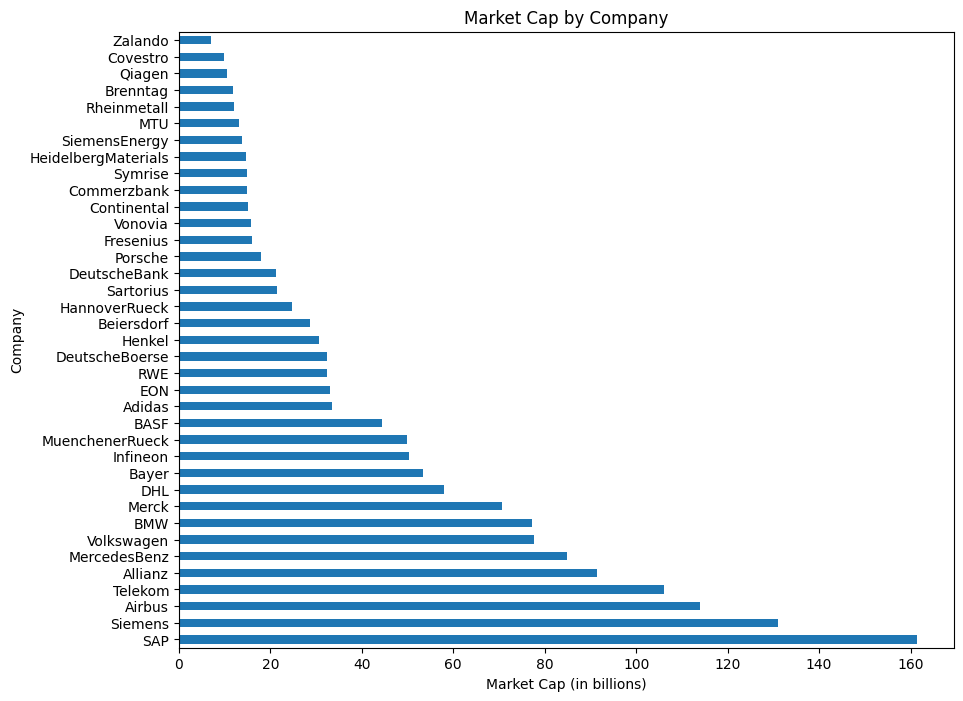

In [90]:
import matplotlib.pyplot as plt

# Sort the data by market cap in descending order
enriched_cleaned_data_new = enriched_cleaned_data_new.sort_values(by='market_cap_in_usd_b', ascending=False)

# Create a horizontal stacked bar chart
enriched_cleaned_data_new.plot(x='company', y=['market_cap_in_usd_b'], kind='barh', stacked=True, legend=False, figsize=(10, 8))

# Set the title and axis labels
plt.title('Market Cap by Company')
plt.xlabel('Market Cap (in billions)')
plt.ylabel('Company')

# Show the plot
plt.show()

### Stage 1: Data Analysis

# Setup & Data Loading

In [91]:
%pip install seaborn
%pip install scipy
%pip install scikit-learn
%pip install gensim


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [92]:

# Import needed packages
import ast
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import skew, kurtosis


In [93]:
file_path = '../data/checkpoints/enriched_cleaned_data_new_2021.csv'

with open(file_path, 'r') as f:
    for i, line in enumerate(f, start=1):
        fields = line.split('|')
        if len(fields) != 1:  # Adjust this condition based on the expected number of fields
            print(f'Error in line {i}: {line}')

In [94]:
# Load a few rows from the CSV file
df_check = pd.read_csv('../data/checkpoints/enriched_cleaned_data_new_2021.csv', delimiter=',', nrows=5)

# Print the loaded data
print(df_check)

         company               datatype  date  internal title  \
0    Rheinmetall  Sustainability Report  2021         1   the   
1  SiemensEnergy  Sustainability Report  2021         1     ,   
2        Symrise  Sustainability Report  2021         1   the   
3    Continental  Sustainability Report  2021         1   the   
4   DeutscheBank  Sustainability Report  2021         1   and   

                                     cleaned_content  \
0  basic information rheinmetall groupstructure r...   
1  sustainability report creating transparency si...   
2  gri sustainability record us international sta...   
3  turn change opportunity embrace sustainability...   
4  deutsche bank nonfinancial report letter chief...   

                                         word_tokens  \
0  ['basic', 'information', 'rheinmetall', 'group...   
1  ['sustainability', 'report', 'creating', 'tran...   
2  ['gri', 'sustainability', 'record', 'us', 'int...   
3  ['turn', 'change', 'opportunity', 'embrace', 

In [95]:
# Load the data
cleaned_data_last = pd.read_csv('../data/checkpoints/enriched_cleaned_data_new_2021.csv', delimiter=',')


In [96]:
# Set the theme and figisze for a unique plot appearence
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [98]:
# Print the first 37 rows of the loaded data
print(cleaned_data_last.head(37))

                company               datatype  date  internal title  \
0           Rheinmetall  Sustainability Report  2021         1   the   
1         SiemensEnergy  Sustainability Report  2021         1     ,   
2               Symrise  Sustainability Report  2021         1   the   
3           Continental  Sustainability Report  2021         1   the   
4          DeutscheBank  Sustainability Report  2021         1   and   
5              Covestro  Sustainability Report  2021         1   the   
6                   MTU  Sustainability Report  2021         1   the   
7                 Bayer  Sustainability Report  2021         1   the   
8       MuenchenerRueck  Sustainability Report  2021         1     .   
9               Zalando  Sustainability Report  2021         1     ,   
10                  BMW  Sustainability Report  2021         1   the   
11       DeutscheBoerse  Sustainability Report  2021         1   the   
12            Fresenius  Sustainability Report  2021         1  

# Data Preparation & simple Feature Engineering

As a preperation step, the tokenzied words are converted to lists so later operations work as expected. The word counts for the tokenized words and sentences are introduced as simple features for later analysis.


In [99]:
# Define a function to convert a string representation of a list to a list datatype
def string_to_list(string):
    try:
        return ast.literal_eval(string)
    except (ValueError, SyntaxError):
        print('List conversion failed')
        return []

# Convert the string representations of the lists to the correct 'list' datatype
cleaned_data_last['word_tokens'] = cleaned_data_last['word_tokens'].apply(string_to_list)
cleaned_data_last['sentence_tokens'] = cleaned_data_last['sentence_tokens'].apply(string_to_list)
cleaned_data_last['pos_tagged_word_tokens'] = cleaned_data_last['pos_tagged_word_tokens'].apply(string_to_list)
cleaned_data_last['pos_tagged_sentence_tokens'] = cleaned_data_last['pos_tagged_sentence_tokens'].apply(string_to_list)


In [100]:
# Add some count features for the analysis
cleaned_data_last['cnt_word'] = cleaned_data_last['word_tokens'].apply(len)
cleaned_data_last['cnt_sentence'] = cleaned_data_last['sentence_tokens'].apply(len)

# Calculate ratio between words/sentences
cleaned_data_last['ratio_word_sentence'] = cleaned_data_last['cnt_word'] / cleaned_data_last['cnt_sentence']

In [101]:
# Check the data with a few samples
cleaned_data_last.sample(5)

,company,datatype,date,internal,title,cleaned_content,word_tokens,sentence_tokens,pos_tagged_word_tokens,pos_tagged_sentence_tokens,company_name,symbol,market_cap_in_usd_b,country,sector,industry,st1_sentiment_continuous,cnt_word,cnt_sentence,ratio_word_sentence
22,Qiagen,Sustainability Report,2021,1,and,sustainy report sustainability report governan...,"[sustainy, report, sustainability, report, gov...","[, sustainy report sustainability report gover...","[(sustainy, JJ), (report, NN), (sustainability...","[[], [(sustainy, JJ), (report, NN), (sustainab...",Qiagen N.V.,QIA,10.49,Netherlands,Healthcare,Diagnostics & Research,0.019487,8702,493,17.651116
6,MTU,Sustainability Report,2021,1,the,acting tomorrow today responsibility plan sust...,"[acting, tomorrow, today, responsibility, plan...",[acting tomorrow today responsibility plans su...,"[(acting, VBG), (tomorrow, NN), (today, NN), (...","[[(acting, VBG), (tomorrow, NN), (today, NN), ...",MTU Aero Engines AG,MTX,13.21,Germany,Industrials,Aerospace & Defense,0.018378,24901,1676,14.857399
33,DHL,Sustainability Report,2021,1,the,combined management report nonfinancial statem...,"[combined, management, report, nonfinancial, s...",[combined management report nonfinancial state...,"[(combined, JJ), (management, NN), (report, NN...","[[(combined, VBN), (management, NN), (report, ...",Deutsche Post AG,DHL,57.95,Germany,Industrials,Integrated Freight & Logistics,0.018219,3350,212,15.801887
8,MuenchenerRueck,Sustainability Report,2021,1,.,sustainability report sustainability report an...,"[sustainability, report, sustainability, repor...",[sustainability report sustainability report a...,"[(sustainability, NN), (report, NN), (sustaina...","[[(sustainability, NN), (report, NN), (sustain...",Münchener Rückversicherungs-Gesellschaft Aktie...,MUV2,49.87,Germany,Financials,Insurance—Reinsurance,0.018395,32801,2745,11.949362
23,RWE,Sustainability Report,2021,1,the,focus tomorrow sustainability report energy su...,"[focus, tomorrow, sustainability, report, ener...","[focus tomorrow, sustainability report energy ...","[(focus, NN), (tomorrow, NN), (sustainability,...","[[(focus, NN), (tomorrow, NN)], [(sustainabili...",RWE AG,RWE,32.35,Germany,Utilities,Utilities—Diversified,0.013654,32319,2142,15.088235


# General Descriptive Analysis 

To get a fast overview in terms of the statistial key metrics, several functions are defined. These ensure quick insights into the data.

In [102]:
def plot_basic_hist_and_box(column, data):
    """
    Plots a histogram and boxplot of a specified column in a pandas DataFrame.

    Args:
    - column (str): The name of the column to plot.
    - data (pandas DataFrame): The DataFrame containing the column.

    Returns:
    - None
    """
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

def calculate_basic_statistical_properties(column, data):
    """
    Calculates basic statistical properties of a specified column in a pandas DataFrame.

    Args:
    - column (str): The name of the column to analyze.
    - data (pandas DataFrame): The DataFrame containing the column.

    Returns:
    - None
    """
    mean = data[column].mean()
    median = data[column].median()
    mode = data[column].mode().values[0]
    skewness = skew(data[column].dropna())
    kurt = kurtosis(data[column].dropna())
    
    print(f'Mean: {round(mean,2)}\nMedian: {round(median,2)}\nMode: {round(mode,2)}\nSkewness: {round(skewness,2)}\nKurtosis: {round(kurt,2)}')

def calulate_dispersion_measures(column, data):
    """
    Calculates measures of dispersion of a specified column in a pandas DataFrame.

    Args:
    - column (str): The name of the column to analyze.
    - data (pandas DataFrame): The DataFrame containing the column.

    Returns:
    - None
    """
    min_value = data[column].min()
    max_value = data[column].max()
    range_value = max_value - min_value
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    variance = data[column].var()
    std_dev = data[column].std()
    
    print(f'Range: {round(range_value,2)}\nInterquartile Range: {round(iqr,2)}\nVariance: {round(variance,2)}\nStandard Deviation: {round(std_dev,2)}')

### Basic Statistical Metrics of documents by Words

Mean: 31577.08
Median: 32801.0
Mode: 3350
Skewness: 0.21
Kurtosis: 0.06
Range: 71034
Interquartile Range: 21159.0
Variance: 241924869.97
Standard Deviation: 15553.93


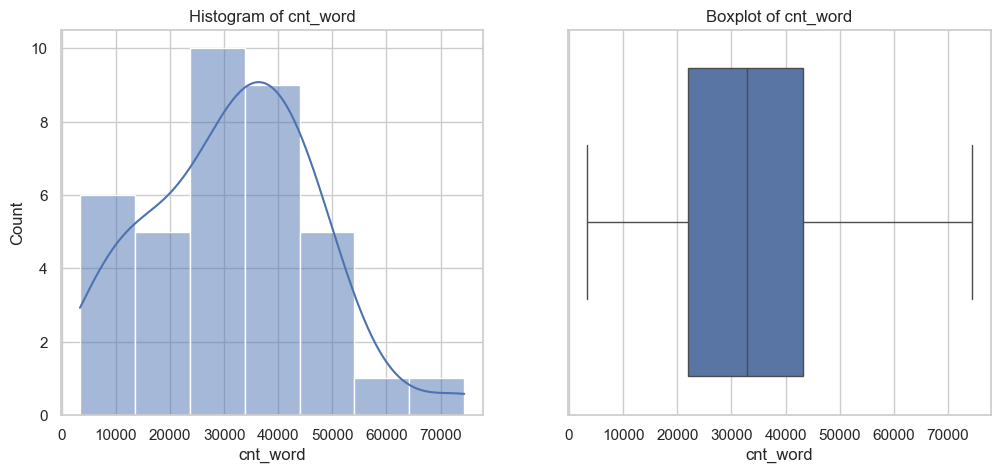

In [103]:
calculate_basic_statistical_properties('cnt_word', cleaned_data_last)
calulate_dispersion_measures('cnt_word', cleaned_data_last)
plot_basic_hist_and_box('cnt_word', cleaned_data_last)

In [104]:
average_sentiment = cleaned_data_last.groupby('company')['st1_sentiment_continuous'].mean()
print(average_sentiment)

company
Adidas                 0.018259
Airbus                 0.017821
Allianz                0.018116
BASF                   0.018786
BMW                    0.017979
Bayer                  0.018680
Beiersdorf             0.019817
Brenntag               0.018195
Commerzbank            0.017837
Continental            0.017767
Covestro               0.018556
DHL                    0.018219
DeutscheBank           0.017723
DeutscheBoerse         0.015751
EON                    0.017514
Fresenius              0.018011
HannoverRueck          0.018542
HeidelbergMaterials    0.018709
Henkel                 0.018979
Infineon               0.018381
MTU                    0.018378
MercedesBenz           0.018746
Merck                  0.018736
MuenchenerRueck        0.018395
Porsche                0.018476
Qiagen                 0.019487
RWE                    0.013654
Rheinmetall            0.019156
SAP                    0.018051
Sartorius              0.017118
Siemens                0.019526


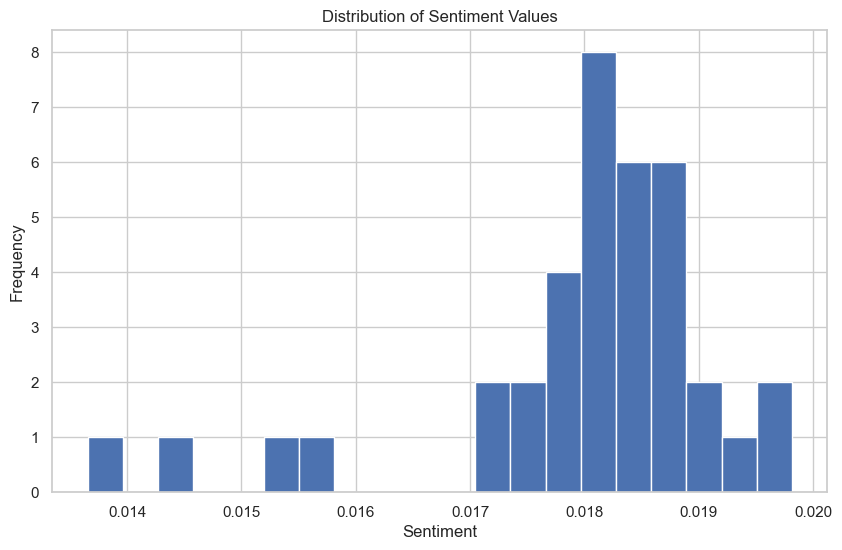

In [105]:
import matplotlib.pyplot as plt

plt.hist(cleaned_data_last['st1_sentiment_continuous'], bins=20)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Values')
plt.show()

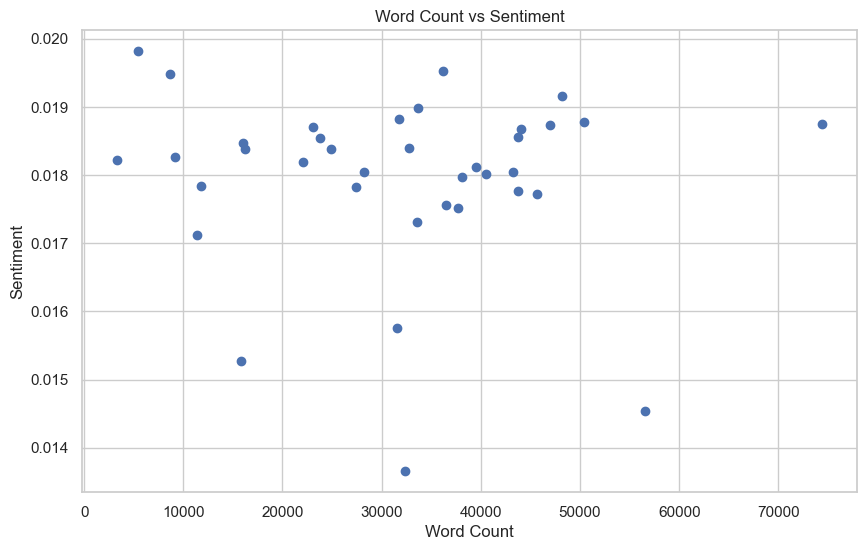

In [106]:
plt.scatter(cleaned_data_last['cnt_word'], cleaned_data_last['st1_sentiment_continuous'])
plt.xlabel('Word Count')
plt.ylabel('Sentiment')
plt.title('Word Count vs Sentiment')
plt.show()

In [107]:
average_sentiment_by_country = cleaned_data_last.groupby('country')['st1_sentiment_continuous'].mean()
print(average_sentiment_by_country)

country
Germany        0.017931
Netherlands    0.018654
Name: st1_sentiment_continuous, dtype: float64


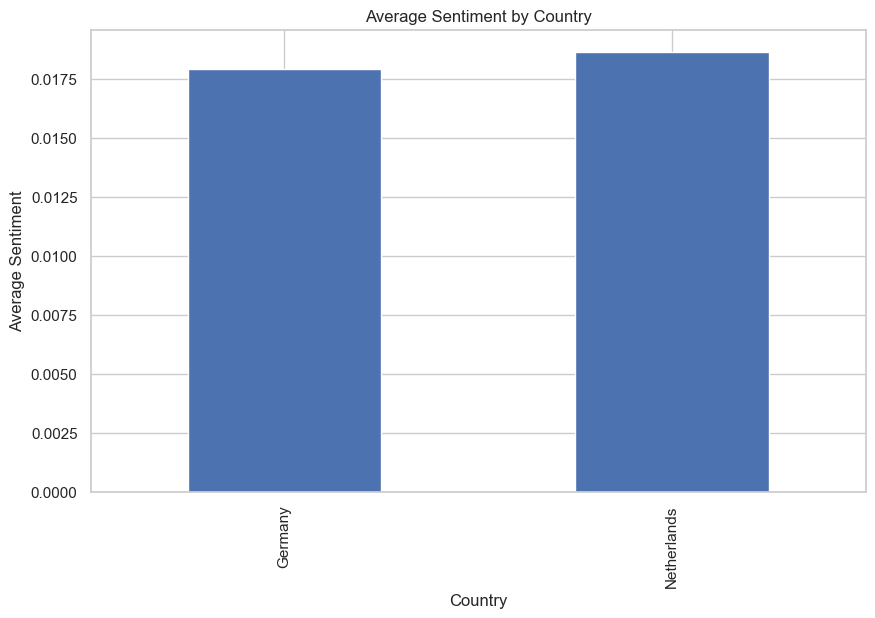

In [108]:
average_sentiment_by_country.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Country')
plt.show()

In [109]:
average_sentiment_by_industry = cleaned_data_last.groupby('industry')['st1_sentiment_continuous'].mean()
print(average_sentiment_by_industry)

industry
Aerospace & Defense                       0.018100
Auto Manufacturers                        0.018126
Auto Parts                                0.017767
Banks—Regional                            0.017780
Building Materials                        0.018709
Chemicals                                 0.018786
Diagnostics & Research                    0.019487
Drug Manufacturers—General                0.018680
Drug Manufacturers—Specialty & Generic    0.018736
Financial Data & Stock Exchanges          0.015751
Footwear & Accessories                    0.018259
Household & Personal Products             0.019398
Industrial Distribution                   0.019156
Insurance—Diversified                     0.018116
Insurance—Reinsurance                     0.018468
Integrated Freight & Logistics            0.018219
Internet Retail                           0.015273
Medical Care Facilities                   0.018011
Medical Instruments & Supplies            0.017118
Real Estate Services  

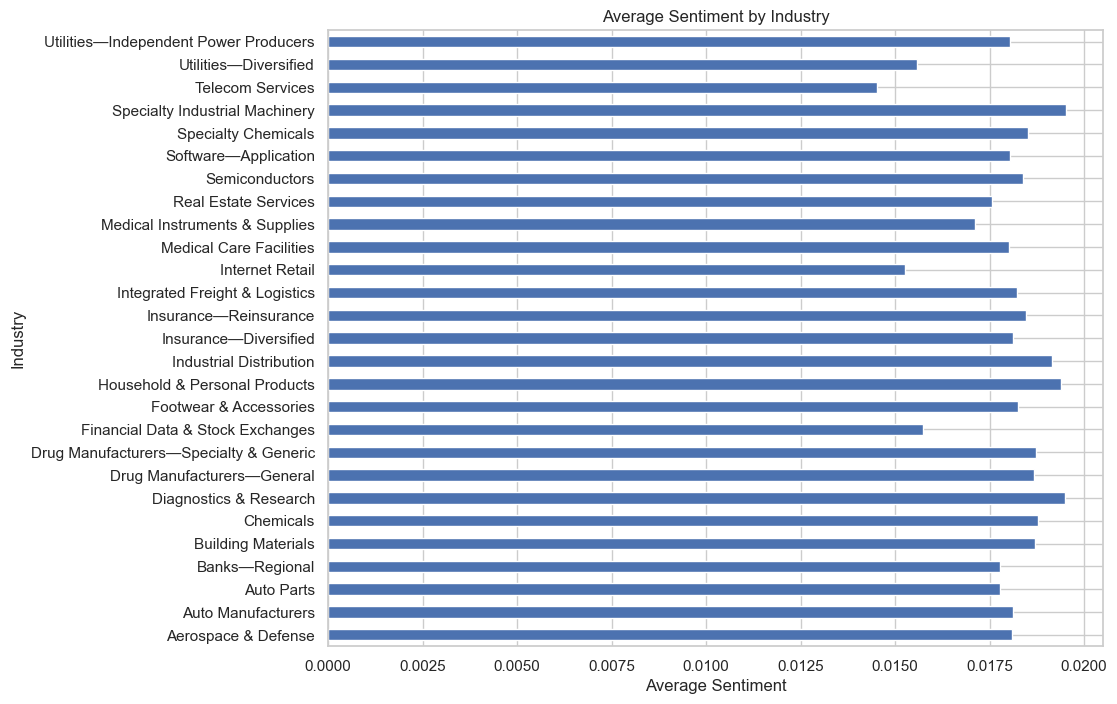

In [110]:
average_sentiment_by_industry.plot(kind='barh', figsize=(10, 8))
plt.xlabel('Average Sentiment')
plt.ylabel('Industry')
plt.title('Average Sentiment by Industry')
plt.show()

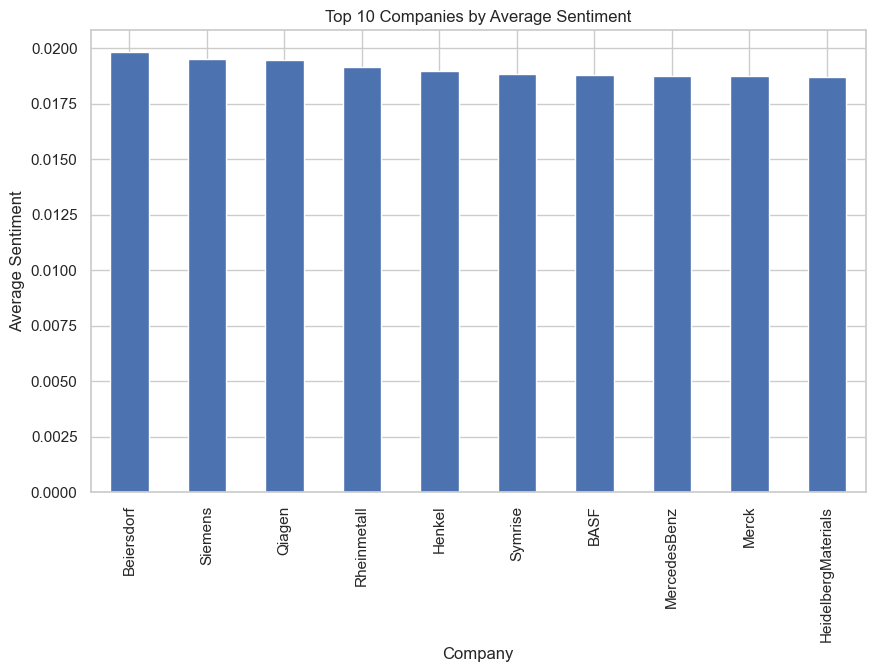

In [111]:
average_sentiment_by_company = cleaned_data_last.groupby('company')['st1_sentiment_continuous'].mean()
top_10_companies = average_sentiment_by_company.sort_values(ascending=False).head(10)

top_10_companies.plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('Average Sentiment')
plt.title('Top 10 Companies by Average Sentiment')
plt.show()

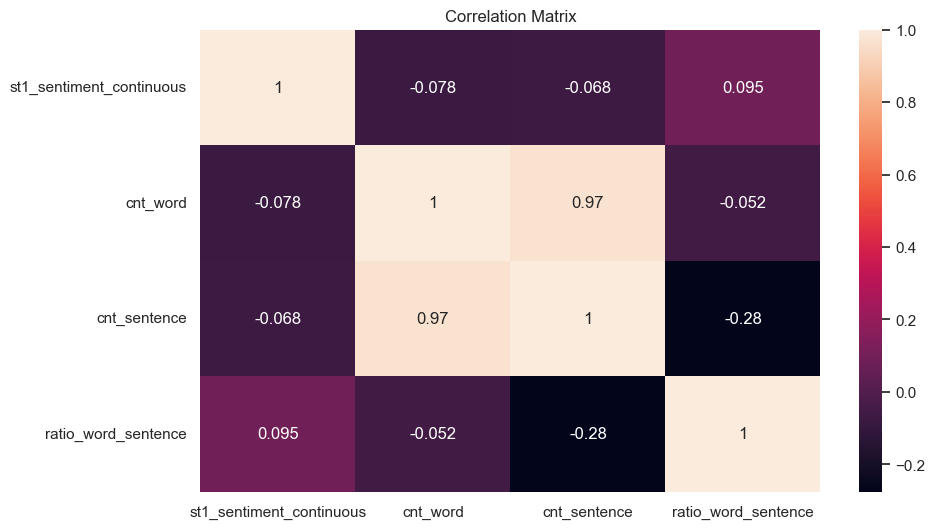

In [112]:
correlation_matrix = cleaned_data_last[['st1_sentiment_continuous', 'cnt_word', 'cnt_sentence', 'ratio_word_sentence']].corr()

import seaborn as sns

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

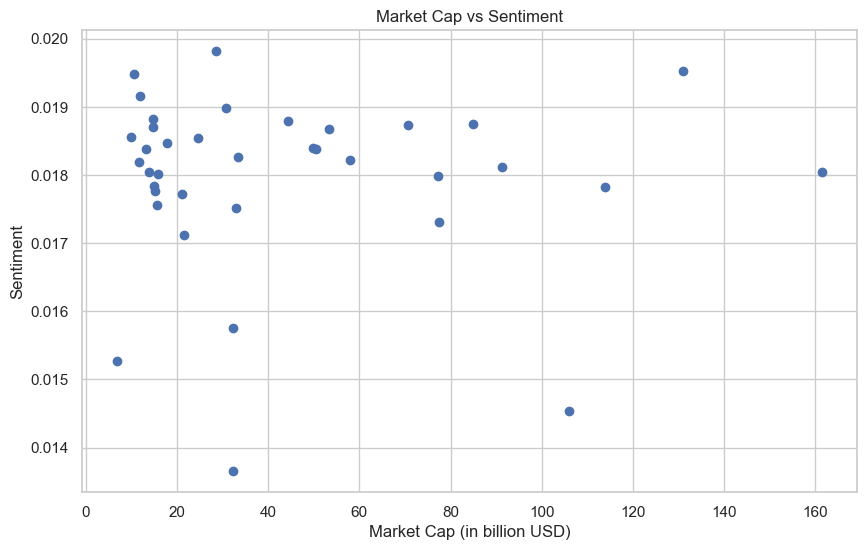

In [113]:
# Convert market cap to numeric
cleaned_data_last['market_cap_in_usd_b'] = pd.to_numeric(cleaned_data_last['market_cap_in_usd_b'], errors='coerce')

plt.scatter(cleaned_data_last['market_cap_in_usd_b'], cleaned_data_last['st1_sentiment_continuous'])
plt.xlabel('Market Cap (in billion USD)')
plt.ylabel('Sentiment')
plt.title('Market Cap vs Sentiment')
plt.show()

In [114]:
# Define bins for market cap
bins = [0, 10, 50, 100, np.inf]
labels = ['Small', 'Medium', 'Large', 'Very Large']
cleaned_data_last['market_cap_group'] = pd.cut(cleaned_data_last['market_cap_in_usd_b'], bins=bins, labels=labels)

# Calculate average sentiment by market cap group
average_sentiment_by_market_cap_group = cleaned_data_last.groupby('market_cap_group')['st1_sentiment_continuous'].mean()
print(average_sentiment_by_market_cap_group)

market_cap_group
Small         0.016914
Medium        0.018043
Large         0.018270
Very Large    0.017482
Name: st1_sentiment_continuous, dtype: float64


/var/folders/ln/8_743tps409d2_3d_6px3_nc0000gn/T/ipykernel_3667/2022677677.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_sentiment_by_market_cap_group = cleaned_data_last.groupby('market_cap_group')['st1_sentiment_continuous'].mean()


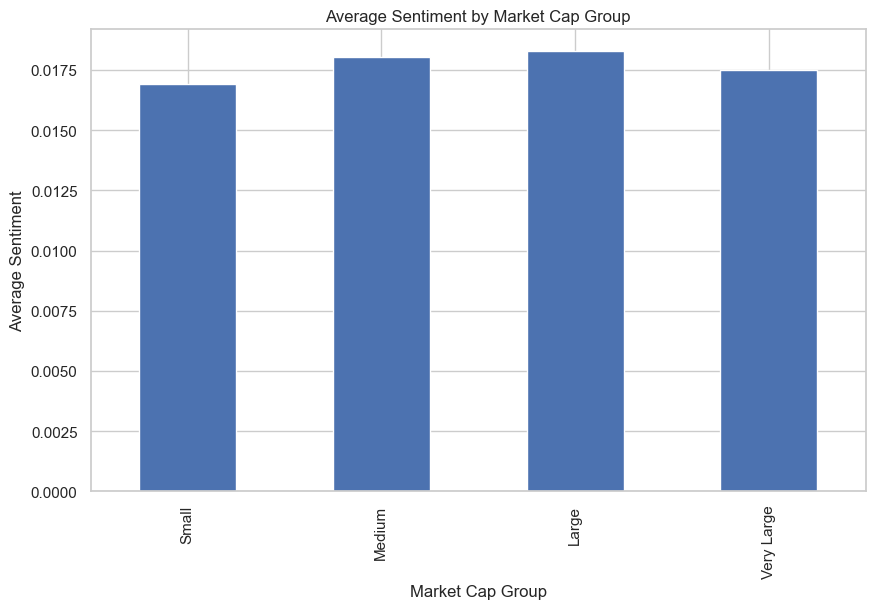

In [115]:
average_sentiment_by_market_cap_group.plot(kind='bar')
plt.xlabel('Market Cap Group')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Market Cap Group')
plt.show()

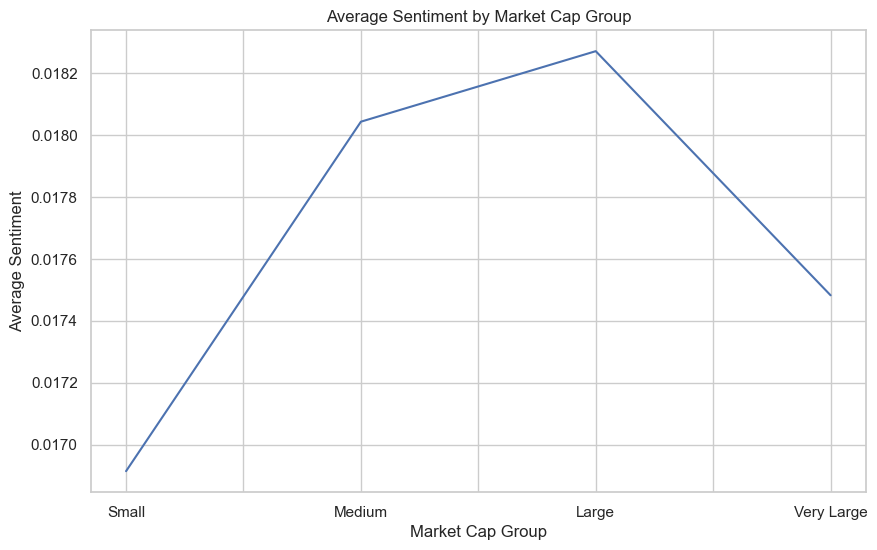

In [117]:
average_sentiment_by_market_cap_group.plot(kind='line')
plt.xlabel('Market Cap Group')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Market Cap Group')
plt.show()

In [119]:
cleaned_data_last.to_csv('/Users/seyyiduzun/Documents/Bachelorarbeit/Bachelorarbeit/comparison/cleaned_data_last_2021.csv', index=False)
